In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
articles = pd.read_csv('./articles.csv')
customers = pd.read_csv('./customers.csv')
transactions = pd.read_csv('./transactions.csv')

## Merge all CSVs

In [4]:
merged_chisquared = pd.merge(transactions,articles,on='article_id')
merged_chisquared = pd.merge(merged_chisquared,customers,on='customer_id')
merged_chisquared

Unnamed: 0       t_dat  \
0           20820952  2020-01-02   
1           20820953  2020-01-02   
2           30333506  2020-08-14   
3           30333505  2020-08-14   
4           24985087  2020-04-24   
...              ...         ...   
10967367    31757758  2020-09-22   
10967368    31779377  2020-09-22   
10967369    31772356  2020-09-22   
10967370    31772357  2020-09-22   
10967371    31772355  2020-09-22   

                                                customer_id  article_id  \
0         00025f8226be50dcab09402a2cacd520a99e112fe01fdd...   797565002   
1         00025f8226be50dcab09402a2cacd520a99e112fe01fdd...   797565001   
2         00025f8226be50dcab09402a2cacd520a99e112fe01fdd...   751471001   
3         00025f8226be50dcab09402a2cacd520a99e112fe01fdd...   781613006   
4         00025f8226be50dcab09402a2cacd520a99e112fe01fdd...   855823003   
...                                                     ...         ...   
10967367  10d455608b1d73268f0a9ff1a392ccd681e665ed471f6d...   932182001   
10967368  b834a2cb440d2298493d254196abb73e101d8b35b155c6...   870982002   
10967369  83b8a97fd3decf8e21d05a9acaea822eaa569c957ea232...   893427001   
10967370  83b8a97fd3decf8e21d05a9acaea822eaa569c957ea232...   893427001   
10967371  83b8a97fd3decf8e21d05a9acaea822eaa569c957ea232...   903910002   

             price  sales_channel_id  product_code              prod_name  \
0         0.030492                 2        797565  Cactus wirless balboa   
1         0.030492                 2        797565  Cactus wirless balboa   
2         0.033881                 2        751471    Pluto RW slacks (1)   
3         0.050831                 2        781613               Jennifer   
4         0.025407                 2        855823     Swift midi bodycon   
...            ...               ...           ...                    ...   
10967367  0.033881                 2        932182           Britney Body   
10967368  0.061000                 2        870982               Tina fur   
10967369  0.084729                 2        893427       Iron PU jumpsuit   
10967370  0.084729                 2        893427       Iron PU jumpsuit   
10967371  0.084729                 2        903910              Oak dress   

          product_type_no  product_type_name  ...                section_name  \
0                     306                Bra  ...             Womens Lingerie   
1                     306                Bra  ...             Womens Lingerie   
2                     272           Trousers  ...  Womens Everyday Collection   
3                     264             Blazer  ...  Womens Everyday Collection   
4                     265              Dress  ...          Divided Collection   
...                   ...                ...  ...                         ...   
10967367              256           Bodysuit  ...  Womens Everyday Collection   
10967368              261  Outdoor Waistcoat  ...          Divided Collection   
10967369              267  Jumpsuit/Playsuit  ...  Womens Everyday Collection   
10967370              267  Jumpsuit/Playsuit  ...  Womens Everyday Collection   
10967371              265              Dress  ...            Womens Tailoring   

          garment_group_no garment_group_name  \
0                     1017  Under-, Nightwear   
1                     1017  Under-, Nightwear   
2                     1009           Trousers   
3                     1008            Dressed   
4                     1013     Dresses Ladies   
...                    ...                ...   
10967367              1005       Jersey Fancy   
10967368              1007            Outdoor   
10967369              1009           Trousers   
10967370              1009           Trousers   
10967371              1013     Dresses Ladies   

                                                detail_desc   FN  Active  \
0         Soft, non-wired lace bra with padded cups for ...  1.0     1.0   
1         Soft, non-wired lace bra wi

# Feature Importance - extracting relevant attributes

Customer age, product_type_name, product_group_name, graphical_appearance_name, colour_group_name, perceived_colour_value_name, perceived_colour_master_name, department_name, index_name, index_group_name, garment_group_name **for all historical transactions**

In [4]:
merged_chisquared_values = merged_chisquared[['product_type_name','product_group_name','graphical_appearance_name','colour_group_name','perceived_colour_value_name','perceived_colour_master_name','department_name','index_name','index_group_name','garment_group_name','age']]
merged_chisquared_values

product_type_name  product_group_name graphical_appearance_name  \
0                       Bra           Underwear                     Solid   
1                       Bra           Underwear                     Solid   
2                  Trousers  Garment Lower body                     Solid   
3                    Blazer  Garment Upper body                     Solid   
4                     Dress   Garment Full body                     Solid   
...                     ...                 ...                       ...   
10967367           Bodysuit  Garment Upper body                     Solid   
10967368  Outdoor Waistcoat  Garment Upper body                     Solid   
10967369  Jumpsuit/Playsuit   Garment Full body                 Treatment   
10967370  Jumpsuit/Playsuit   Garment Full body                 Treatment   
10967371              Dress   Garment Full body                     Solid   

         colour_group_name perceived_colour_value_name  \
0                      Red                      Medium   
1                    Black                        Dark   
2                    Black                        Dark   
3                    Black                        Dark   
4                    Black                        Dark   
...                    ...                         ...   
10967367             Black                        Dark   
10967368       Light Beige                 Dusty Light   
10967369             Black                        Dark   
10967370             Black                        Dark   
10967371    Dark Turquoise                        Dark   

         perceived_colour_master_name      department_name        index_name  \
0                                 Red  Expressive Lingerie  Lingeries/Tights   
1                               Black  Expressive Lingerie  Lingeries/Tights   
2                               Black              Trouser        Ladieswear   
3                               Black          Suit jacket        Ladieswear   
4                               Black              Dresses           Divided   
...                               ...                  ...               ...   
10967367                        Black         Jersey fancy        Ladieswear   
10967368                        Beige      Outdoor/Blazers           Divided   
10967369                        Black              Trouser        Ladieswear   
10967370                        Black              Trouser        Ladieswear   
10967371                    Turquoise                Dress        Ladieswear   

         index_group_name garment_group_name   age  
0              Ladieswear  Under-, Nightwear  25.0  
1              Ladieswear  Under-, Nightwear  25.0  
2              Ladieswear           Trousers  25.0  
3              Ladieswear            Dressed  25.0  
4                 Divided     Dresses Ladies  25.0  
...                   ...                ...   ...  
10967367       Ladieswear       Jersey Fancy  26.0  
10967368          Divided            Outdoor  62.0  
10967369       Ladieswear           Trousers  22.0  
10967370       Ladieswear           Trousers  22.0  
10967371       Ladieswear     Dresses Ladies  22.0  

[10967372 rows x 11 columns]

In [5]:
# filter transactions by customer age
def load_dataset_age(start_age, end_age):
    age = [x for x in range (start_age,end_age+1)]
    merged_chisquared_values_age = merged_chisquared_values[merged_chisquared_values['age'].isin(age)]
    return merged_chisquared_values_age

In [8]:
#customers between ages 21-30
test_dataset = load_dataset_age(21,30)
test_dataset

product_type_name  product_group_name graphical_appearance_name  \
0                       Bra           Underwear                     Solid   
1                       Bra           Underwear                     Solid   
2                  Trousers  Garment Lower body                     Solid   
3                    Blazer  Garment Upper body                     Solid   
4                     Dress   Garment Full body                     Solid   
...                     ...                 ...                       ...   
10967366           Bodysuit  Garment Upper body                     Solid   
10967367           Bodysuit  Garment Upper body                     Solid   
10967369  Jumpsuit/Playsuit   Garment Full body                 Treatment   
10967370  Jumpsuit/Playsuit   Garment Full body                 Treatment   
10967371              Dress   Garment Full body                     Solid   

         colour_group_name perceived_colour_value_name  \
0                      Red                      Medium   
1                    Black                        Dark   
2                    Black                        Dark   
3                    Black                        Dark   
4                    Black                        Dark   
...                    ...                         ...   
10967366             Black                        Dark   
10967367             Black                        Dark   
10967369             Black                        Dark   
10967370             Black                        Dark   
10967371    Dark Turquoise                        Dark   

         perceived_colour_master_name      department_name        index_name  \
0                                 Red  Expressive Lingerie  Lingeries/Tights   
1                               Black  Expressive Lingerie  Lingeries/Tights   
2                               Black              Trouser        Ladieswear   
3                               Black          Suit jacket        Ladieswear   
4                               Black              Dresses           Divided   
...                               ...                  ...               ...   
10967366                        Black         Jersey fancy        Ladieswear   
10967367                        Black         Jersey fancy        Ladieswear   
10967369                        Black              Trouser        Ladieswear   
10967370                        Black              Trouser        Ladieswear   
10967371                    Turquoise                Dress        Ladieswear   

         index_group_name garment_group_name   age  
0              Ladieswear  Under-, Nightwear  25.0  
1              Ladieswear  Under-, Nightwear  25.0  
2              Ladieswear           Trousers  25.0  
3              Ladieswear            Dressed  25.0  
4                 Divided     Dresses Ladies  25.0  
...                   ...                ...   ...  
10967366       Ladieswear       Jersey Fancy  26.0  
10967367       Ladieswear       Jersey Fancy  26.0  
10967369       Ladieswear           Trousers  22.0  
10967370       Ladieswear           Trousers  22.0  
10967371       Ladieswear     Dresses Ladies  22.0  

[4761777 rows x 11 columns]

## Chi Squared feature selection on article attributes

Feature 0 graphical_appearance_name: 1619256.946592
Feature 1 colour_group_name: 4874844.730943
Feature 2 perceived_colour_value_name: 131647.968420
Feature 3 perceived_colour_master_name: 1953141.153380
Feature 4 index_name: 418682.427195


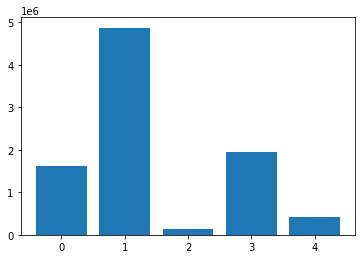

In [13]:
# chi squared feature selection for categorical data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

attributes = ['product_type_name','graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name','index_name']
# load the dataset
def load_dataset(articles):
    article_attr = articles[attributes]
    dataset = article_attr.values
    X = dataset[:, 1:]
    y = dataset[:,0]
    # format all fields as string
    X = X.astype(str)
    return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset HERE
X, y = load_dataset(test_dataset)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d %s: %f' % (i, attributes[i+1], fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

## Mutual Information Feature Selection on article attributes

Feature 0: 0.378622
Feature 1: 0.321259
Feature 2: 0.122302
Feature 3: 0.259857
Feature 4: 0.832939


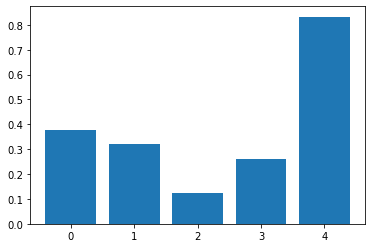

In [14]:
# example of mutual information feature selection for categorical data
from sklearn.feature_selection import mutual_info_classif

# load the dataset
def load_dataset(articles):
    article_attr = articles[attributes]
    dataset = article_attr.values
    X = dataset[:, 1:]
    y = dataset[:,0]
    # format all fields as string
    X = X.astype(str)
    return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# # load the dataset
# X, y = load_dataset(test_dataset)
# # split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# Image Feature extraction using ResNet50

A 50 layer deep convoluted network pre-trained on more than a million images from the ImageNet database helped us to label each article image (from the H&M database) with its feature values (feature map).

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from sklearn.metrics import pairwise_distances
import requests
from PIL import Image
import pickle
from datetime import datetime
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
#import streamlit as st
#use the below library while displaying the images in jupyter notebook
from IPython.display import display, Image

## First 50k images

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

img_width, img_height = 224, 224

#top_model_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
train_data_dir = "/Users/danielyang/Downloads/h-and-m-personalized-fashion-recommendations/images"

nb_train_samples = 50000
epochs = 50
batch_size = 1

def extract_features():
    Itemcodes = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    model = ResNet50(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    for i in generator.filenames:
        Itemcodes.append(i[(i.find("/")+1):i.find(".")])
    extracted_features = model.predict_generator(generator, nb_train_samples // batch_size)
    extracted_features = extracted_features.reshape((50000, 100352))
    
    np.save(open('./hm_50k.npy', 'wb'), extracted_features)
    np.save(open('./hm_product_ids_50k.npy', 'wb'), np.array(Itemcodes))
    
a = datetime.now()
extract_features()
print("Time taken in feature extraction", datetime.now()-a)
extract_features()

## Next 57k images

In [ ]:
img_width, img_height = 224, 224

#top_model_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
train_data_dir = "/Users/danielyang/Downloads/h-and-m-personalized-fashion-recommendations/images2"

# enter sample number
nb_train_samples = 57750
epochs = 50
batch_size = 1

def extract_features():
    Itemcodes = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    model = ResNet50(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    for i in generator.filenames:
        Itemcodes.append(i[(i.find("/")+1):i.find(".")])
    extracted_features = model.predict_generator(generator, nb_train_samples // batch_size)
    extracted_features = extracted_features.reshape((57750, 100352))

    np.save(open('./57k_features_2.npy', 'wb'), extracted_features)
    np.save(open('./57k_ids_2.npy', 'wb'), np.array(Itemcodes))
    
a = datetime.now()
extract_features()

In [6]:
# make a copy of the articles dataframe
# articles = pd.read_csv('./articles.csv')
a_copy = articles.copy()
df_Productids = list(a_copy['article_id'])

## 1st 50K articles

In [3]:
# make sure correct feature map is used
extracted_features = np.load('/Users/danielyang/Desktop/DSAI Lab/hm_50k.npy')
Productids1 = np.load('/Users/danielyang/Desktop/DSAI Lab/hm_product_ids_50k.npy')
Productids1 = list(Productids1)
Productids1

['0108775015',
 '0108775044',
 '0108775051',
 '0110065001',
 '0110065002',
 '0110065011',
 '0111565001',
 '0111565003',
 '0111586001',
 '0111593001',
 '0111609001',
 '0112679048',
 '0112679052',
 '0114428026',
 '0114428030',
 '0116379047',
 '0118458003',
 '0118458004',
 '0118458028',
 '0118458029',
 '0118458034',
 '0118458038',
 '0118458039',
 '0120129001',
 '0120129014',
 '0120129018',
 '0120129025',
 '0123173001',
 '0126589006',
 '0126589007',
 '0126589010',
 '0126589011',
 '0126589012',
 '0129085001',
 '0129085026',
 '0129085027',
 '0130035001',
 '0141661022',
 '0141661025',
 '0144993001',
 '0145872001',
 '0145872037',
 '0145872043',
 '0145872051',
 '0145872052',
 '0145872053',
 '0146706001',
 '0146706004',
 '0146706005',
 '0146721001',
 '0146721002',
 '0146730001',
 '0147339034',
 '0148033001',
 '0148033006',
 '0150959011',
 '0150959013',
 '0153115019',
 '0153115020',
 '0153115021',
 '0153115039',
 '0153115040',
 '0153115043',
 '0156224001',
 '0156224002',
 '0156227001',
 '01562270

==================== input product image ====================


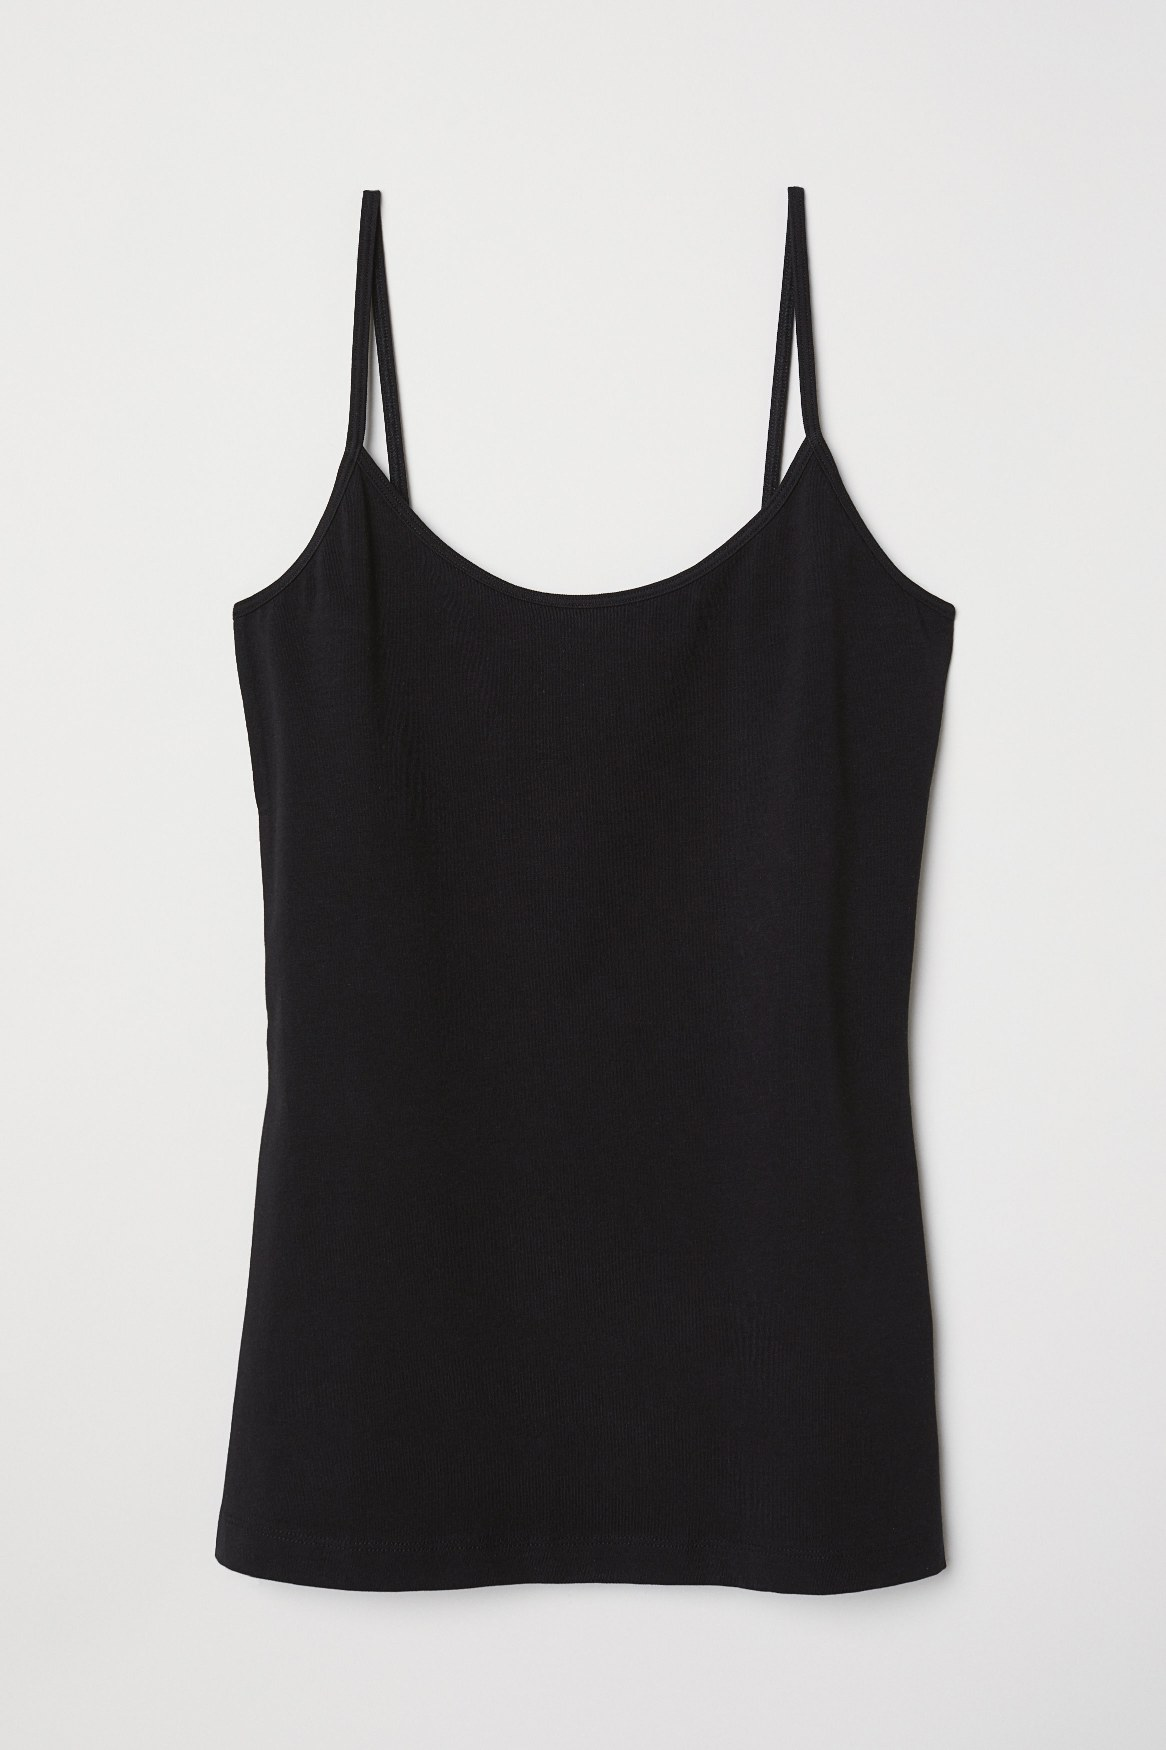

Product Title:  Strap top

 ==================== Recommended products ====================


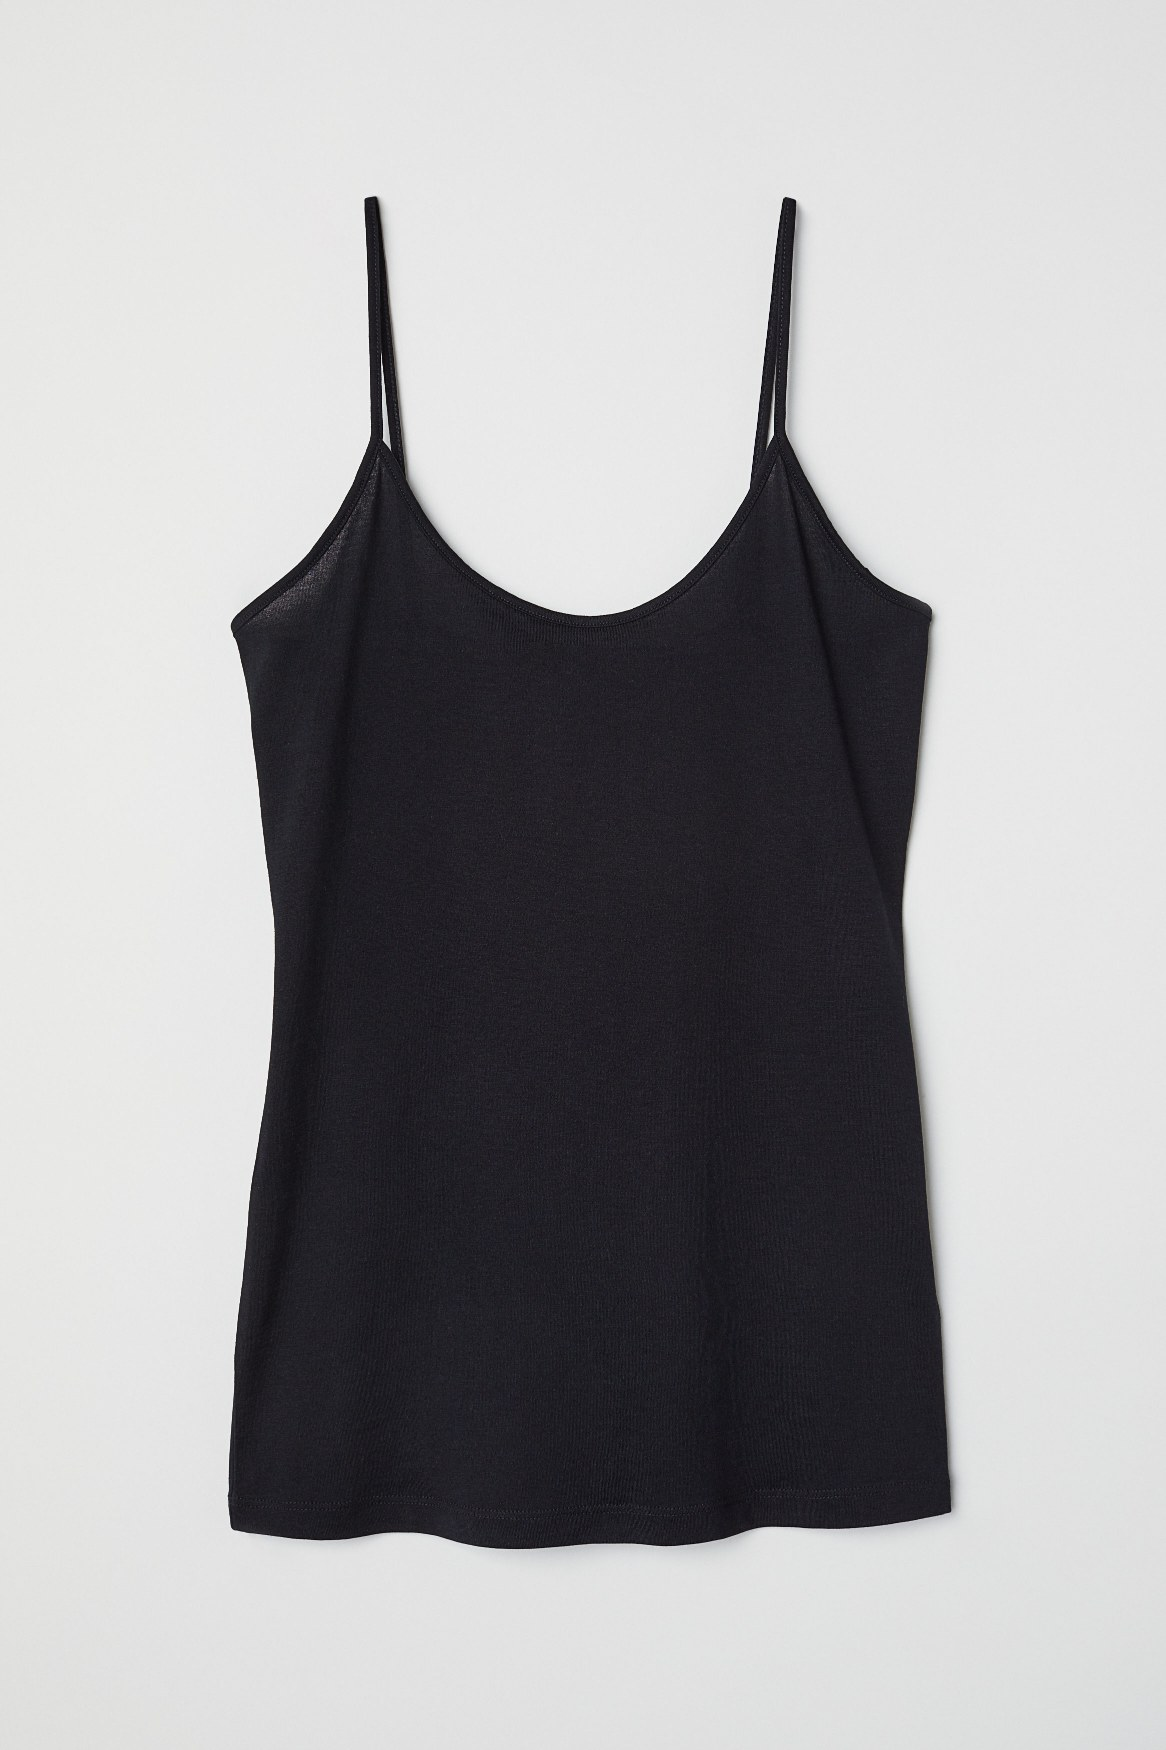

Product Title:  PE Emma Camisole top 2
Euclidean Distance from input image: 18.905054


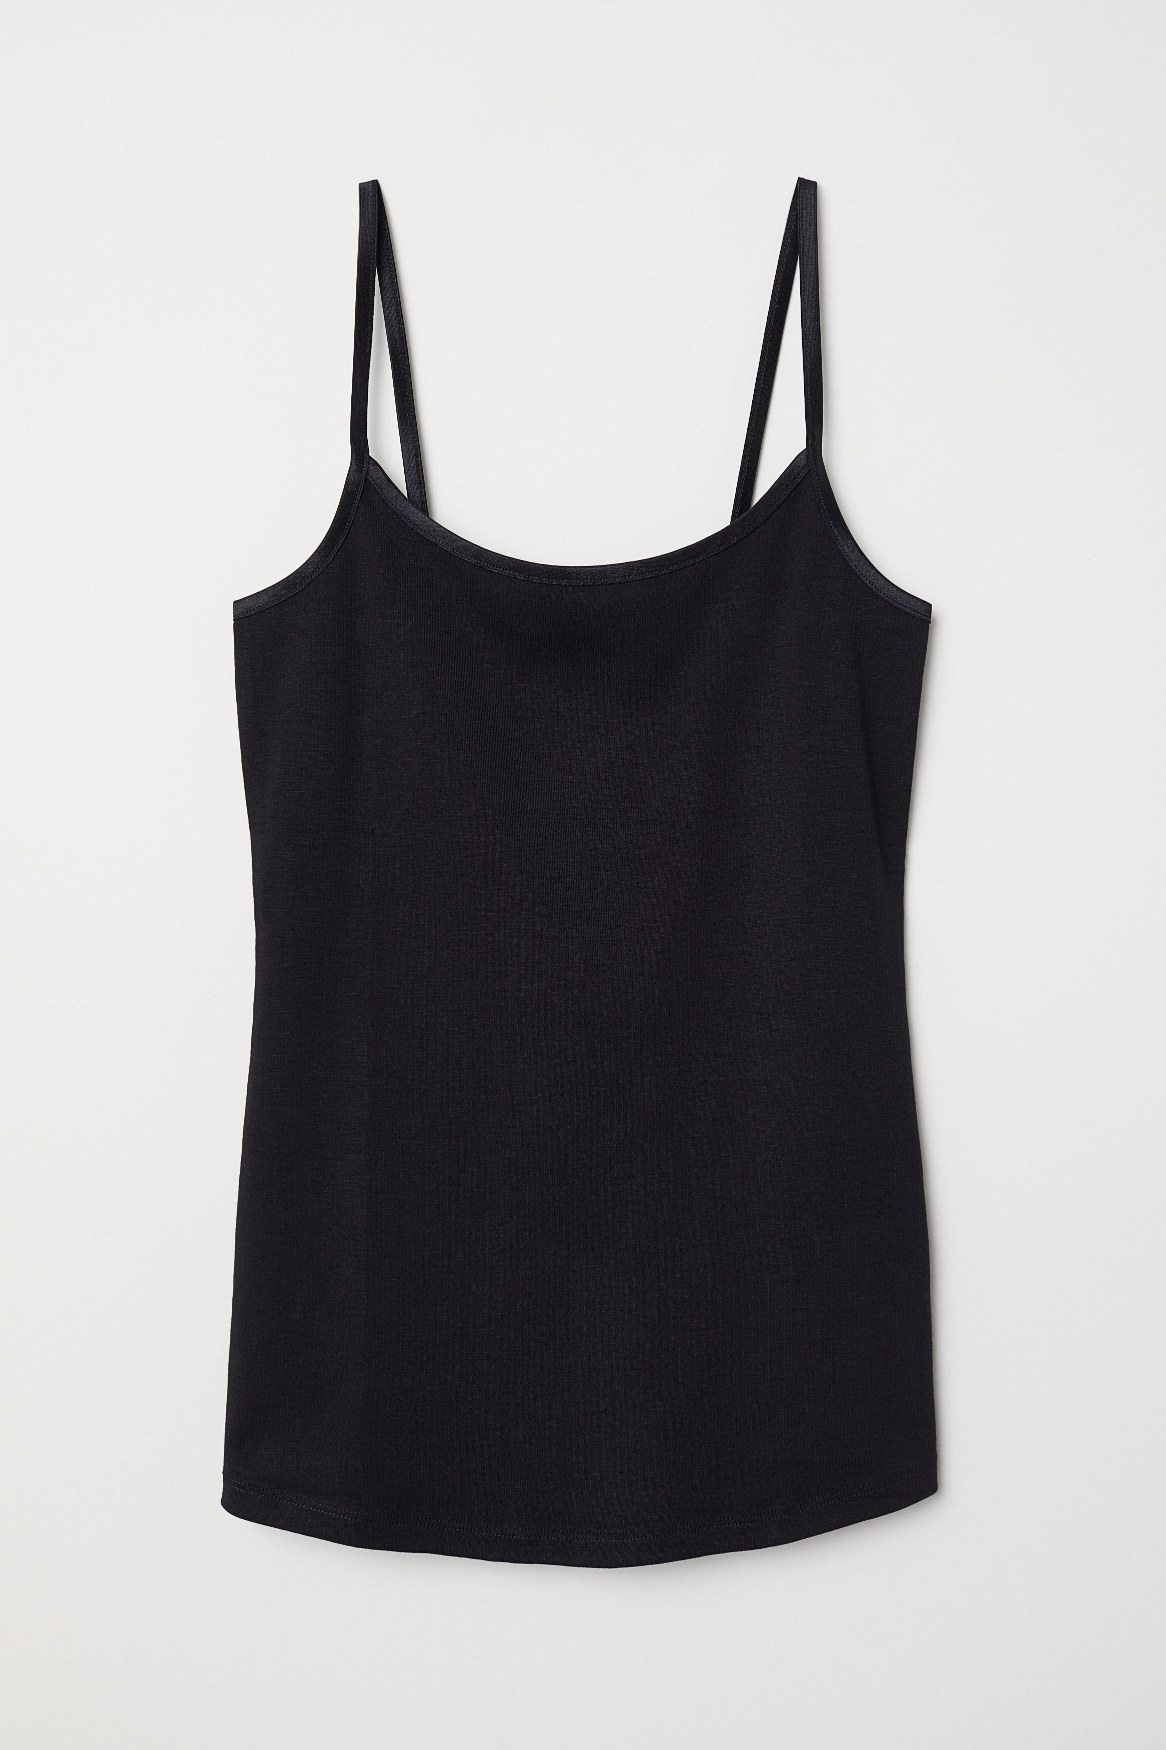

Product Title:  gaby
Euclidean Distance from input image: 20.300877


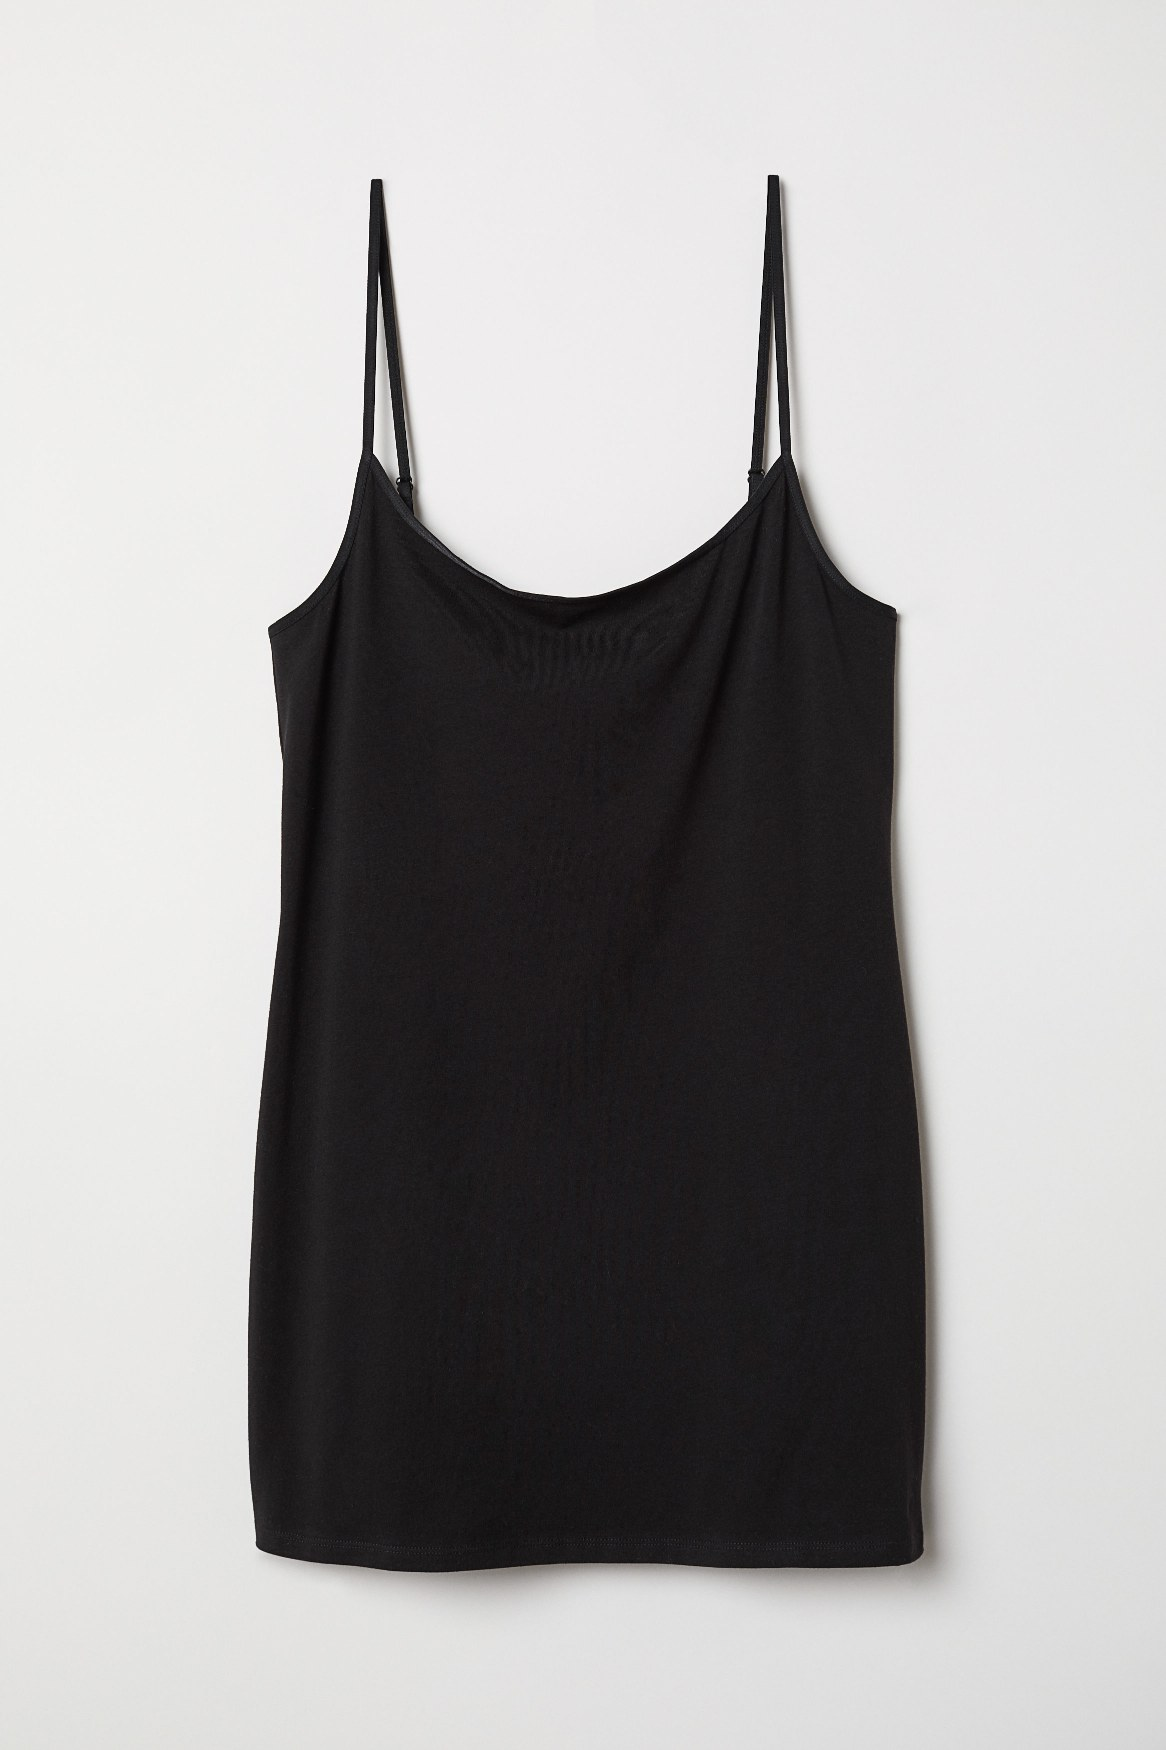

Product Title:  DIV Nicky long tank top
Euclidean Distance from input image: 23.675865


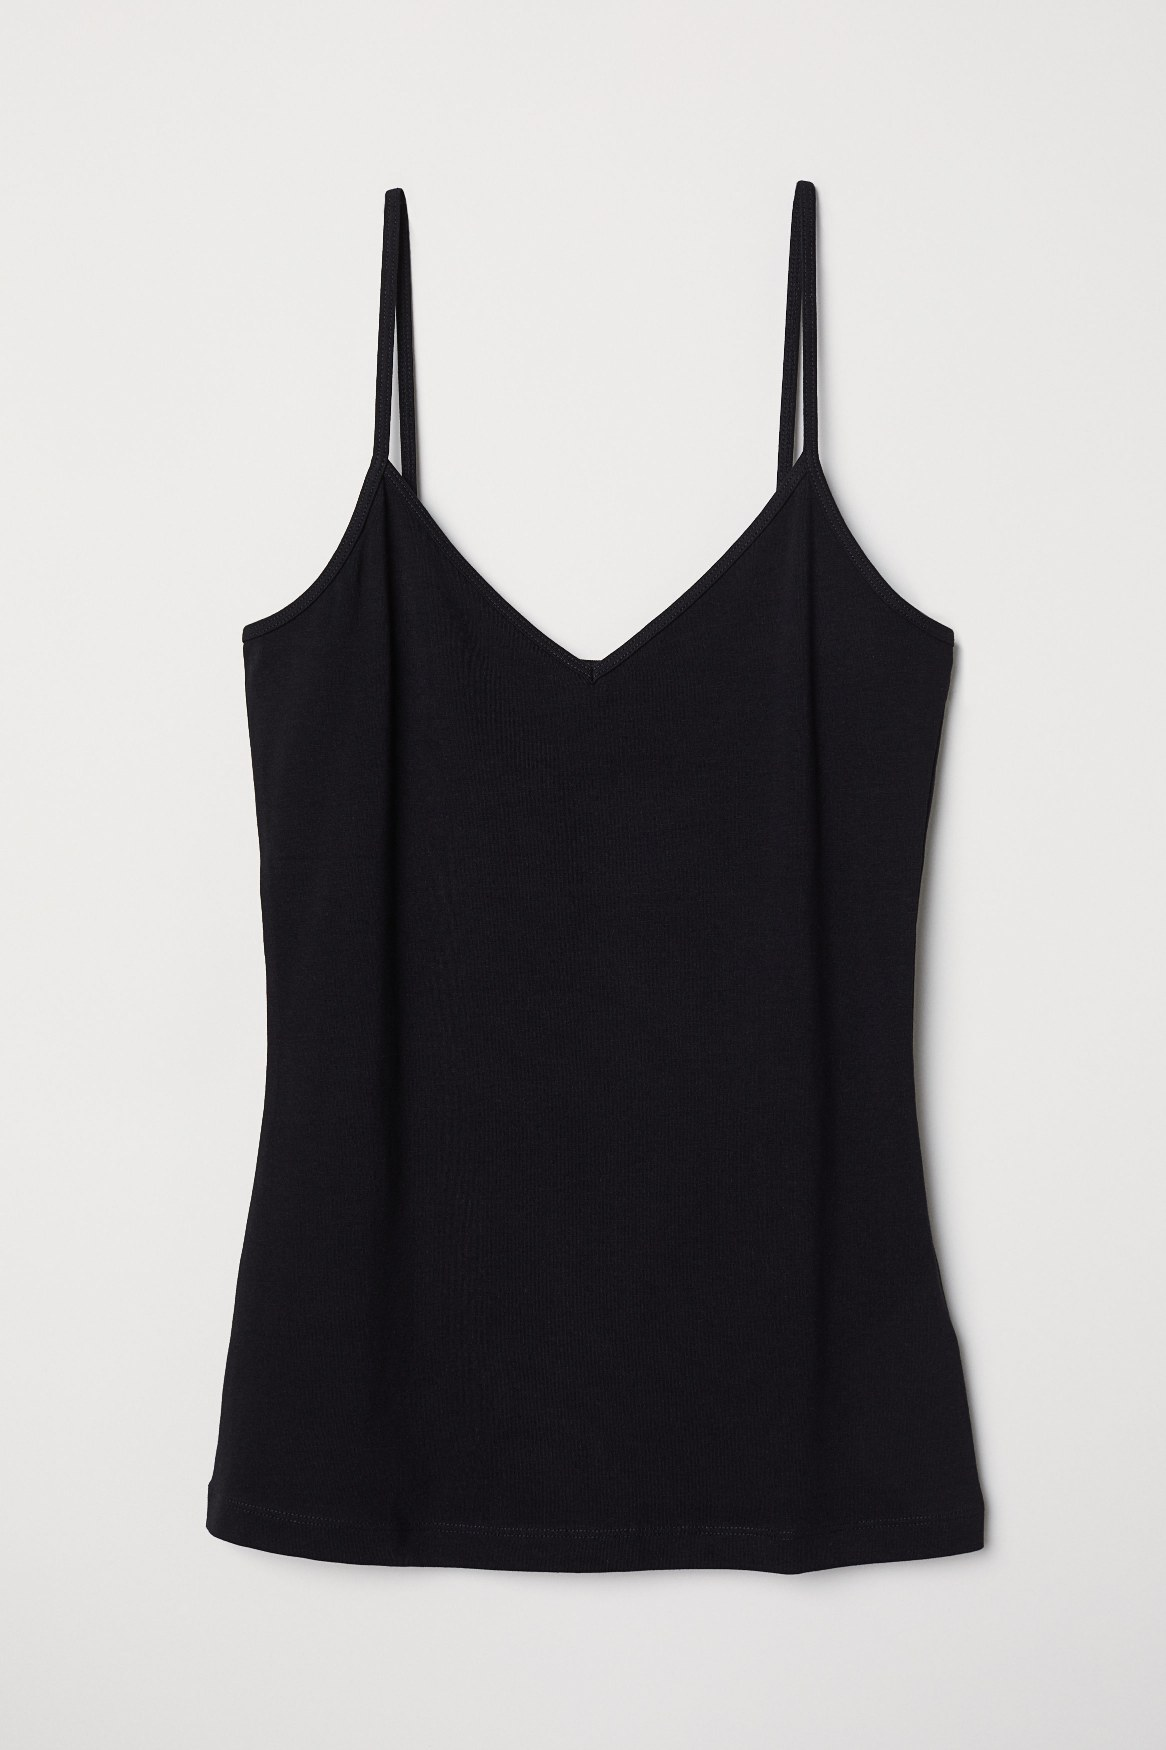

Product Title:  V-neck strap top
Euclidean Distance from input image: 26.318056


In [7]:
def get_similar_products_cnn1(product_id, num_results):
    doc_id = Productids1.index(product_id)
    pairwise_dist = pairwise_distances(extracted_features, extracted_features[doc_id].reshape(1,-1))
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    print("="*20, "input product image", "="*20)
    ip_row = a_copy[['article_id','prod_name']].loc[a_copy['article_id']==int(Productids1[indices[0]])]
#     print(ip_row.head())
    for indx, row in ip_row.iterrows():
        display(Image(filename = "/Users/danielyang/Downloads/h-and-m-personalized-fashion-recommendations/images/" + str(product_id)[0:3]+'/'+str(product_id)+'.jpg', width = 224, height = 224,embed=True))
        print('Product Title: ', row['prod_name'])
    print("\n","="*20, "Recommended products", "="*20)
    for i in range(1,len(indices)):
        rows = a_copy[['article_id','prod_name']].loc[a_copy['article_id']==int(Productids1[indices[i]])]
#         print(rows)
        for indx, row in rows.iterrows():
            display(Image(filename = "/Users/danielyang/Downloads/h-and-m-personalized-fashion-recommendations/images/" + '0' + str(row['article_id'])[0:2] +'/'+ "0" +str(row['article_id'])+'.jpg', width = 224, height = 224,embed=True))
            print('Product Title: ', row['prod_name'])
            print('Euclidean Distance from input image:', pdists[i])

get_similar_products_cnn1('0108775015', 5)

==================== input product image ====================


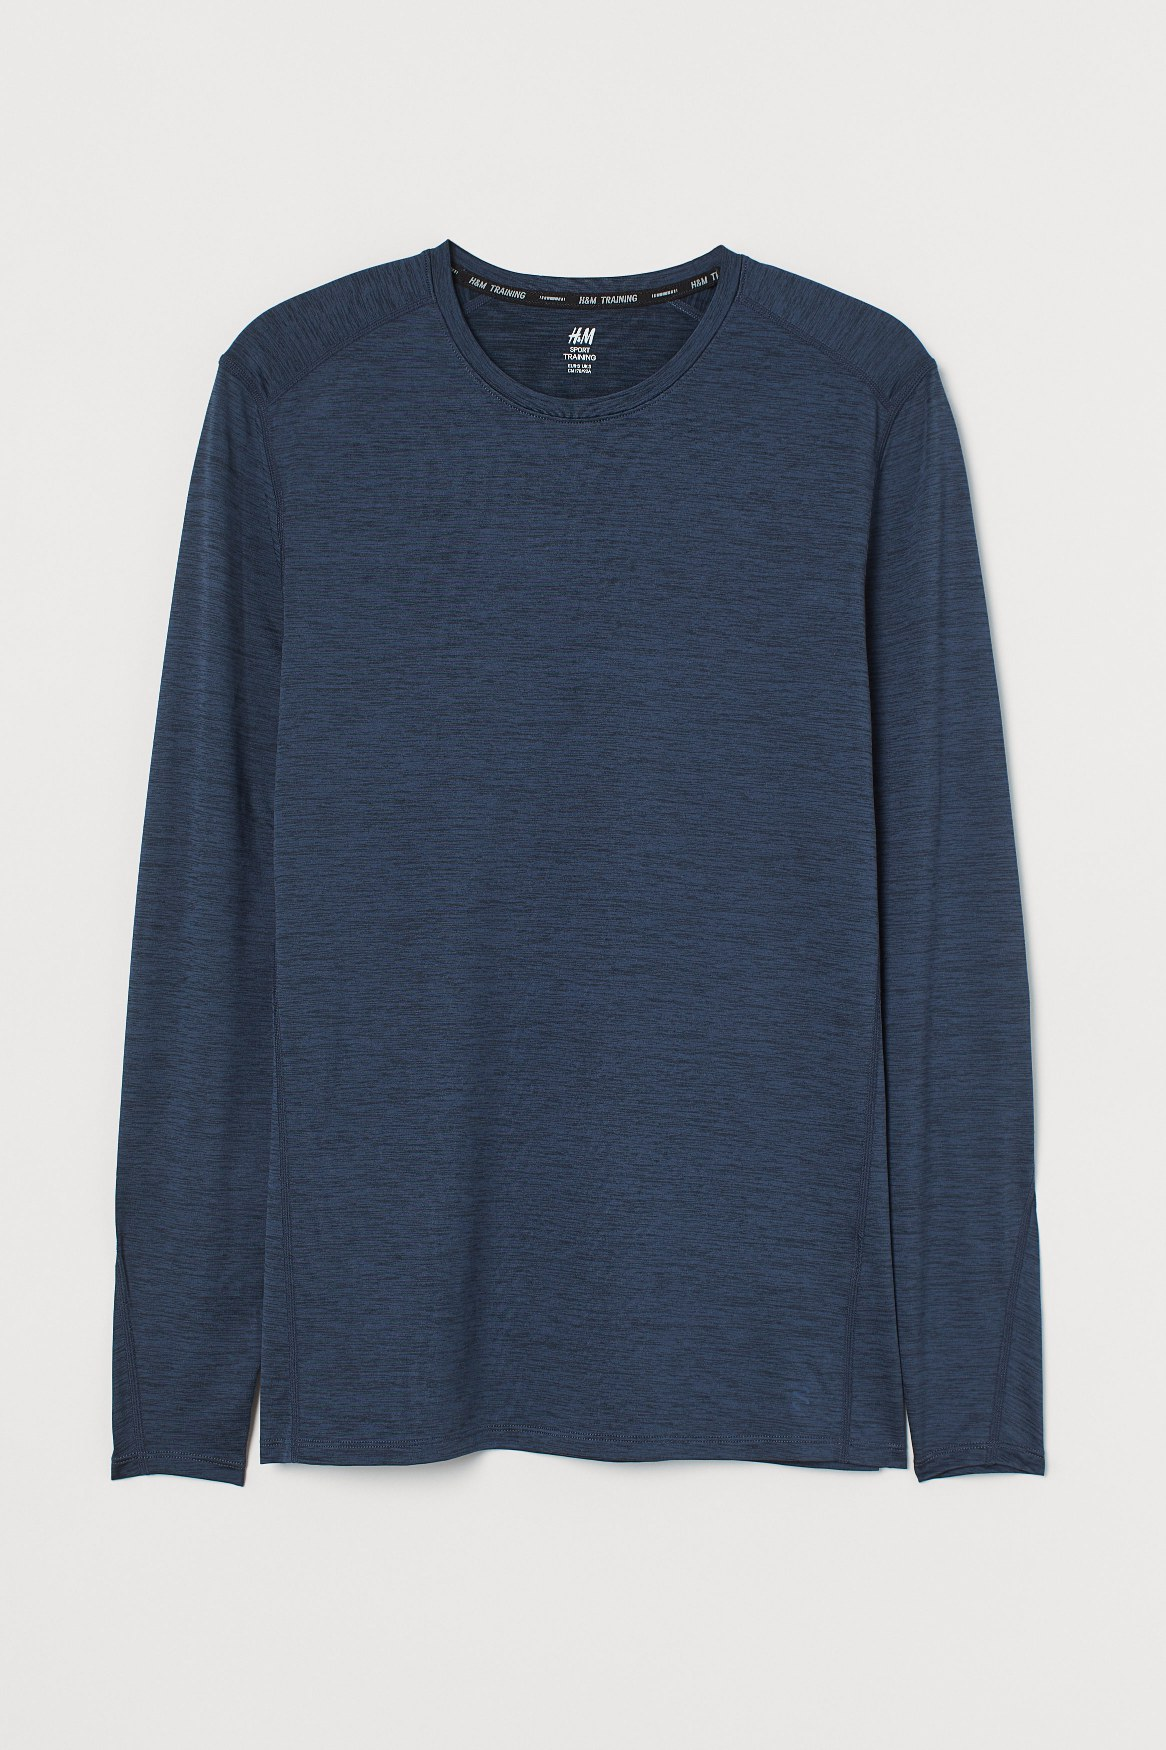

Product Title:  Dorian l/s basic

 ==================== Recommended products ====================


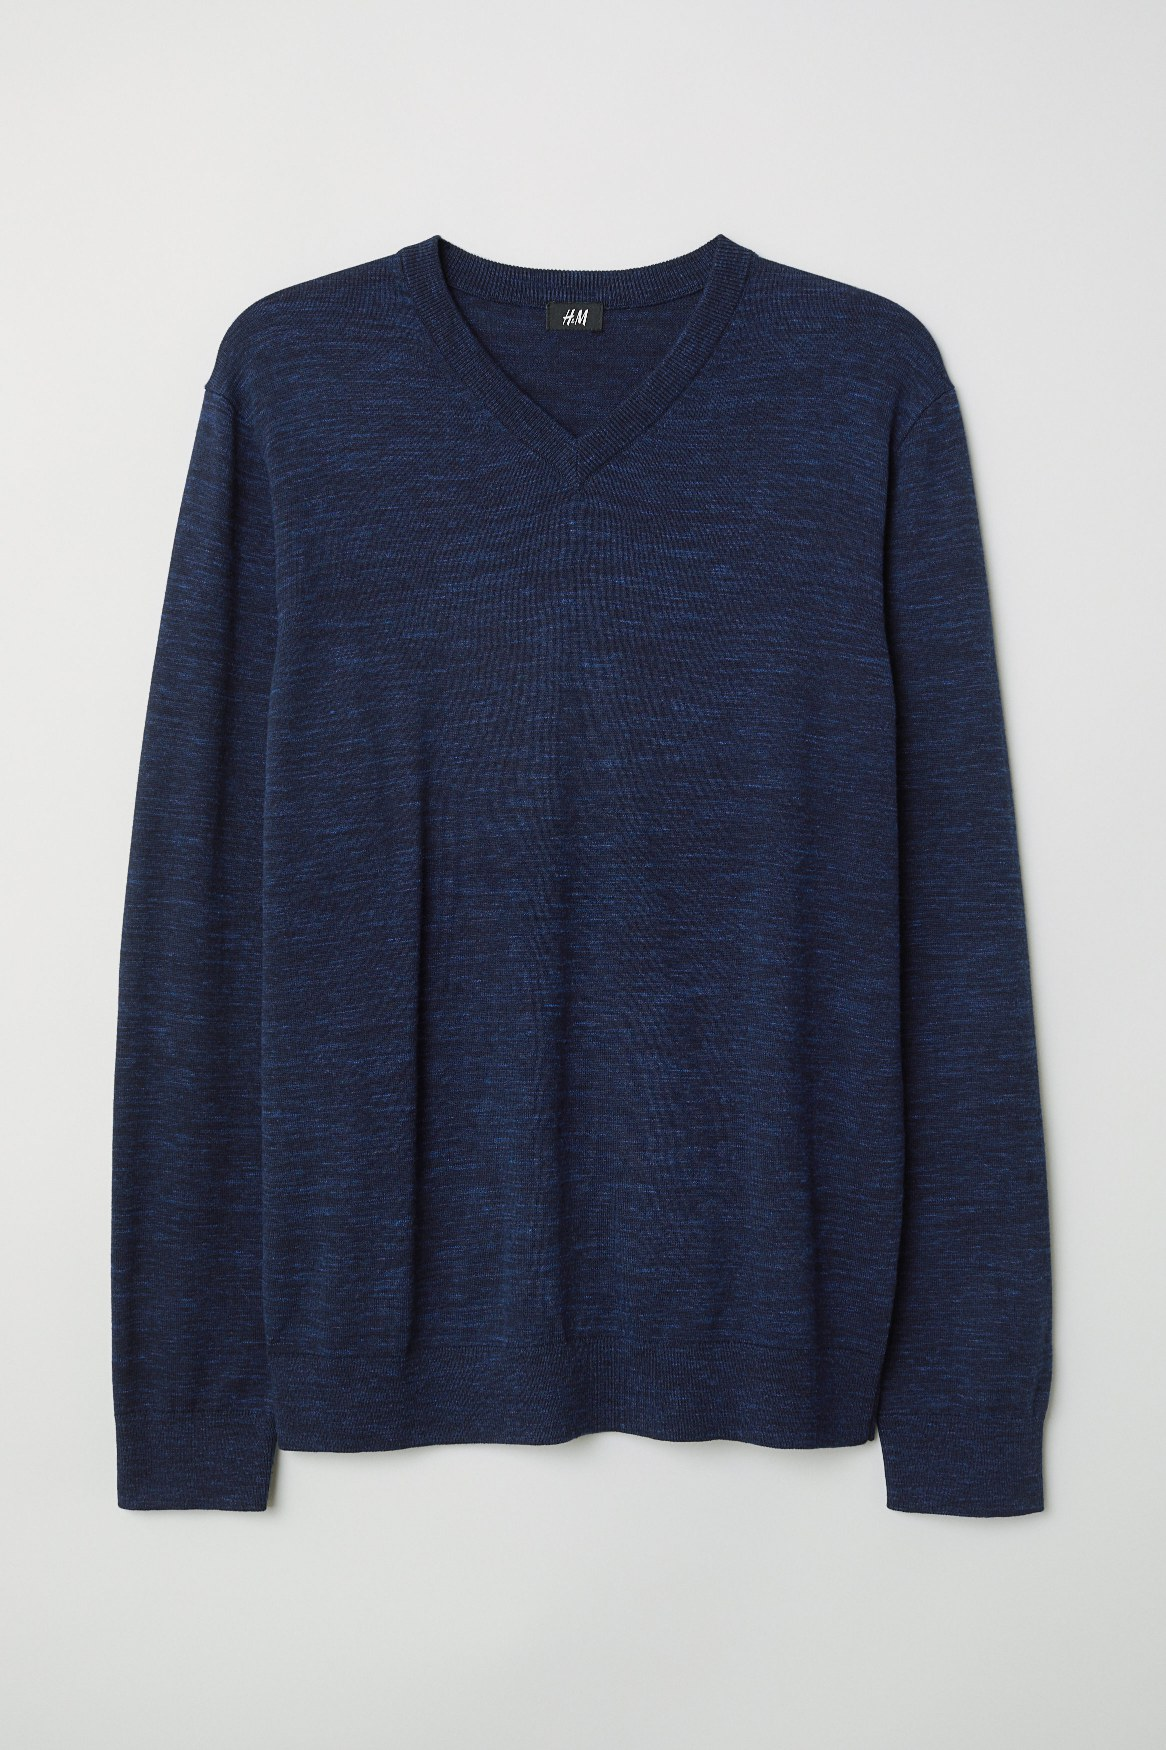

Product Title:  PAUL V-NECK
Euclidean Distance from input image: 11.273617


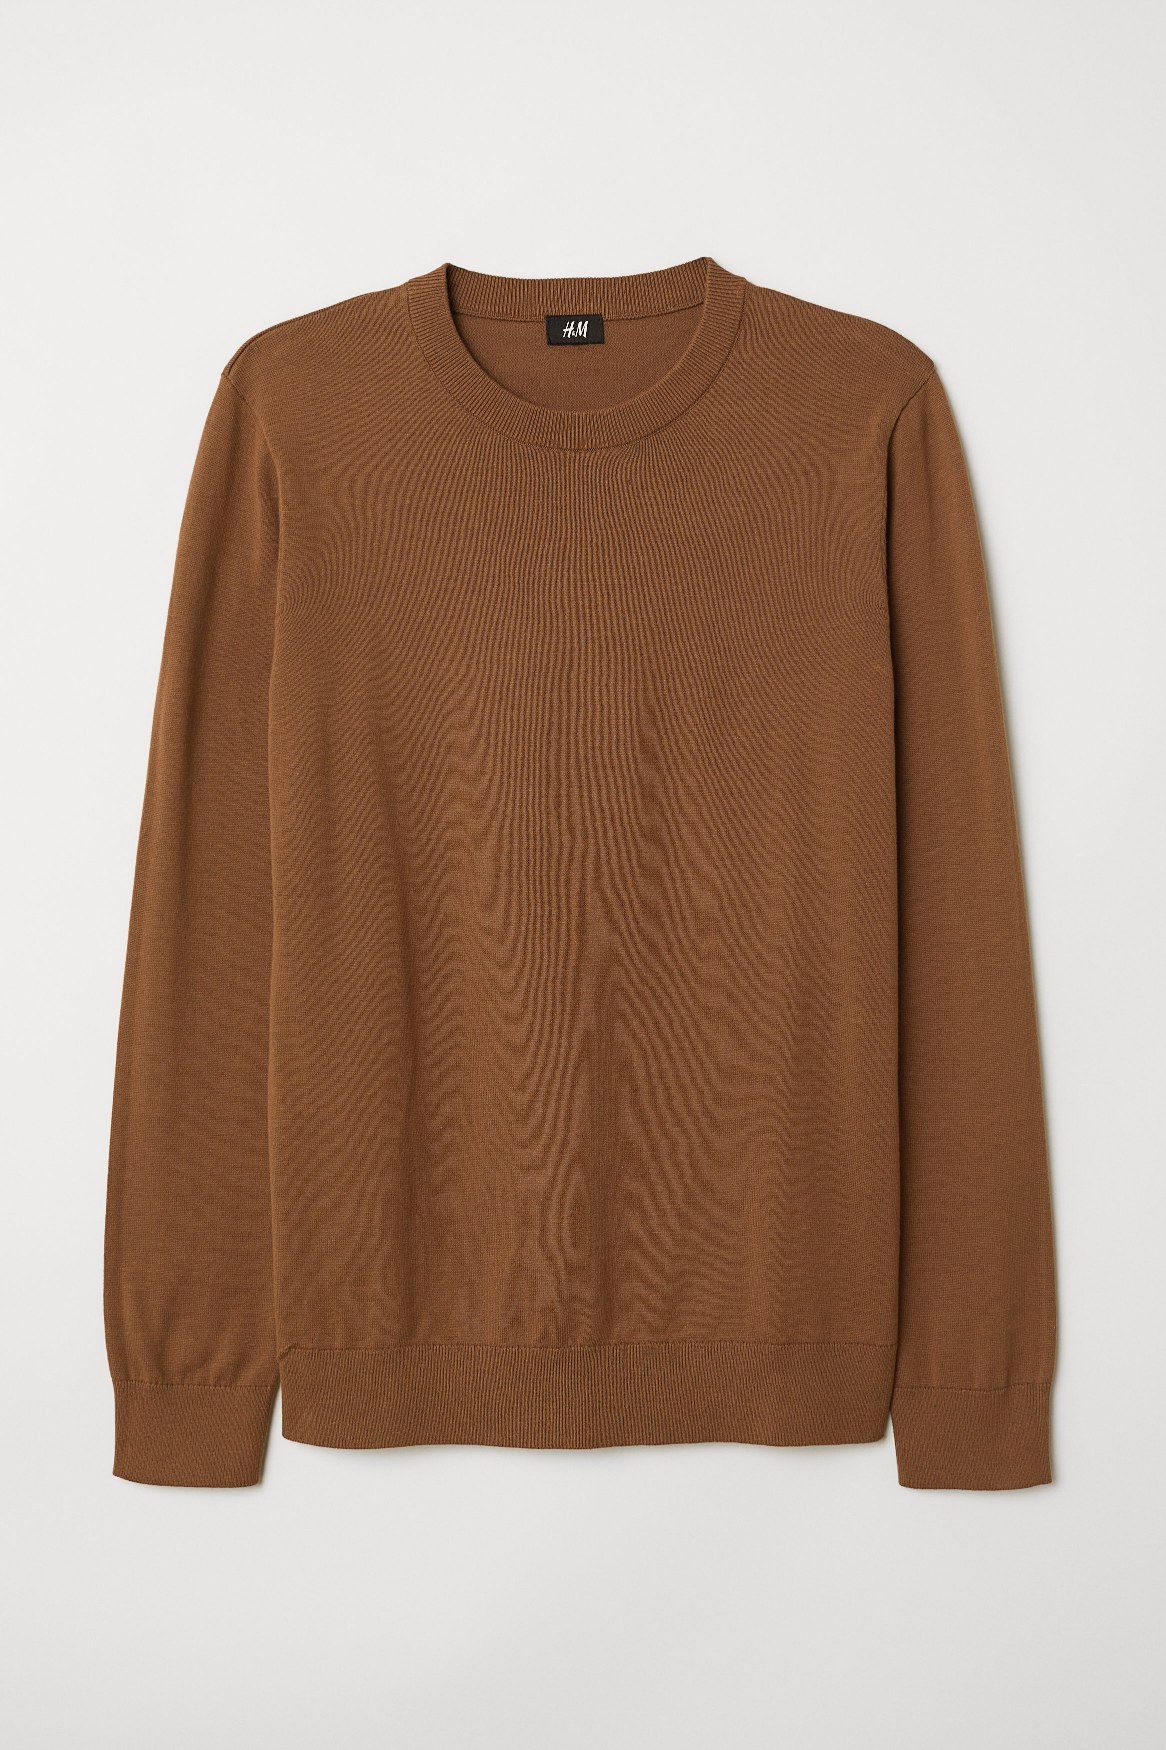

Product Title:  PAUL  R-NECK
Euclidean Distance from input image: 13.108181


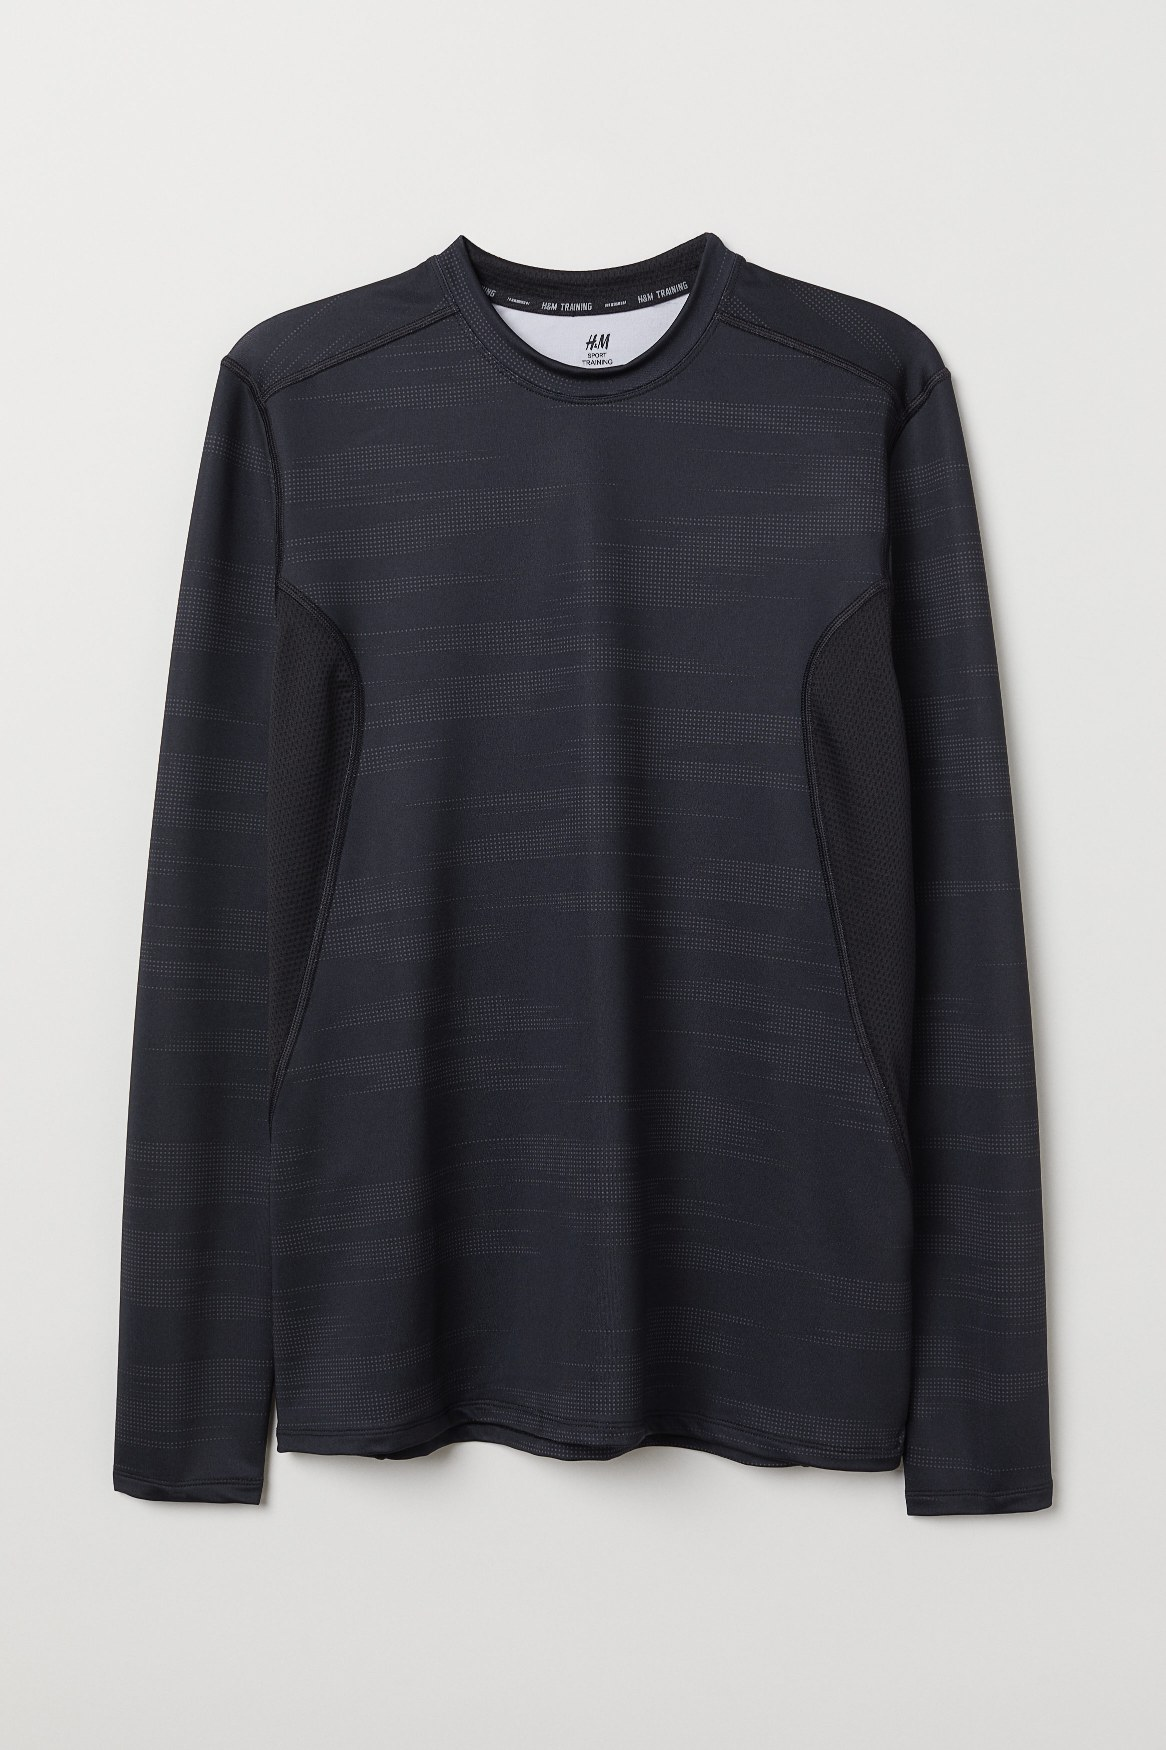

Product Title:  Furno Top
Euclidean Distance from input image: 13.376918


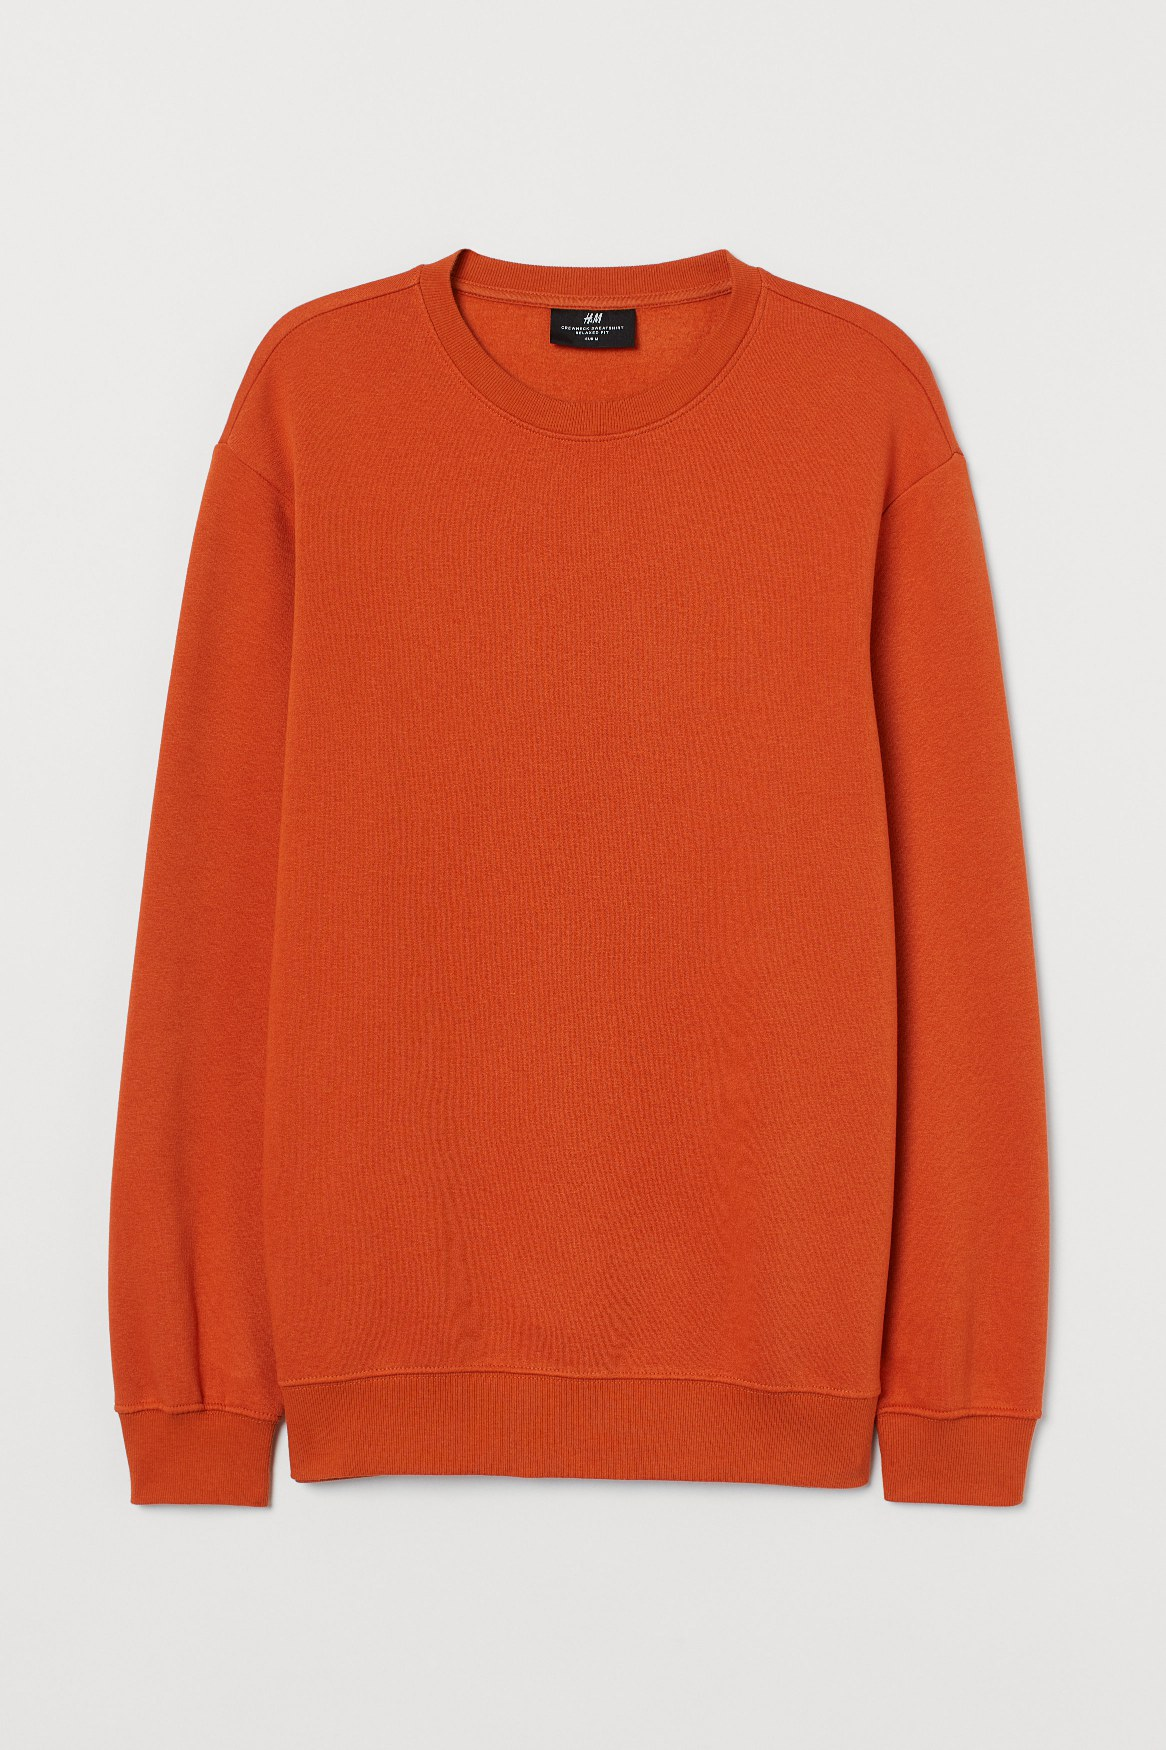

Product Title:  PETAR SWEATSHIRT
Euclidean Distance from input image: 13.795387


In [8]:
get_similar_products_cnn1('0145872052', 5)

==================== input product image ====================


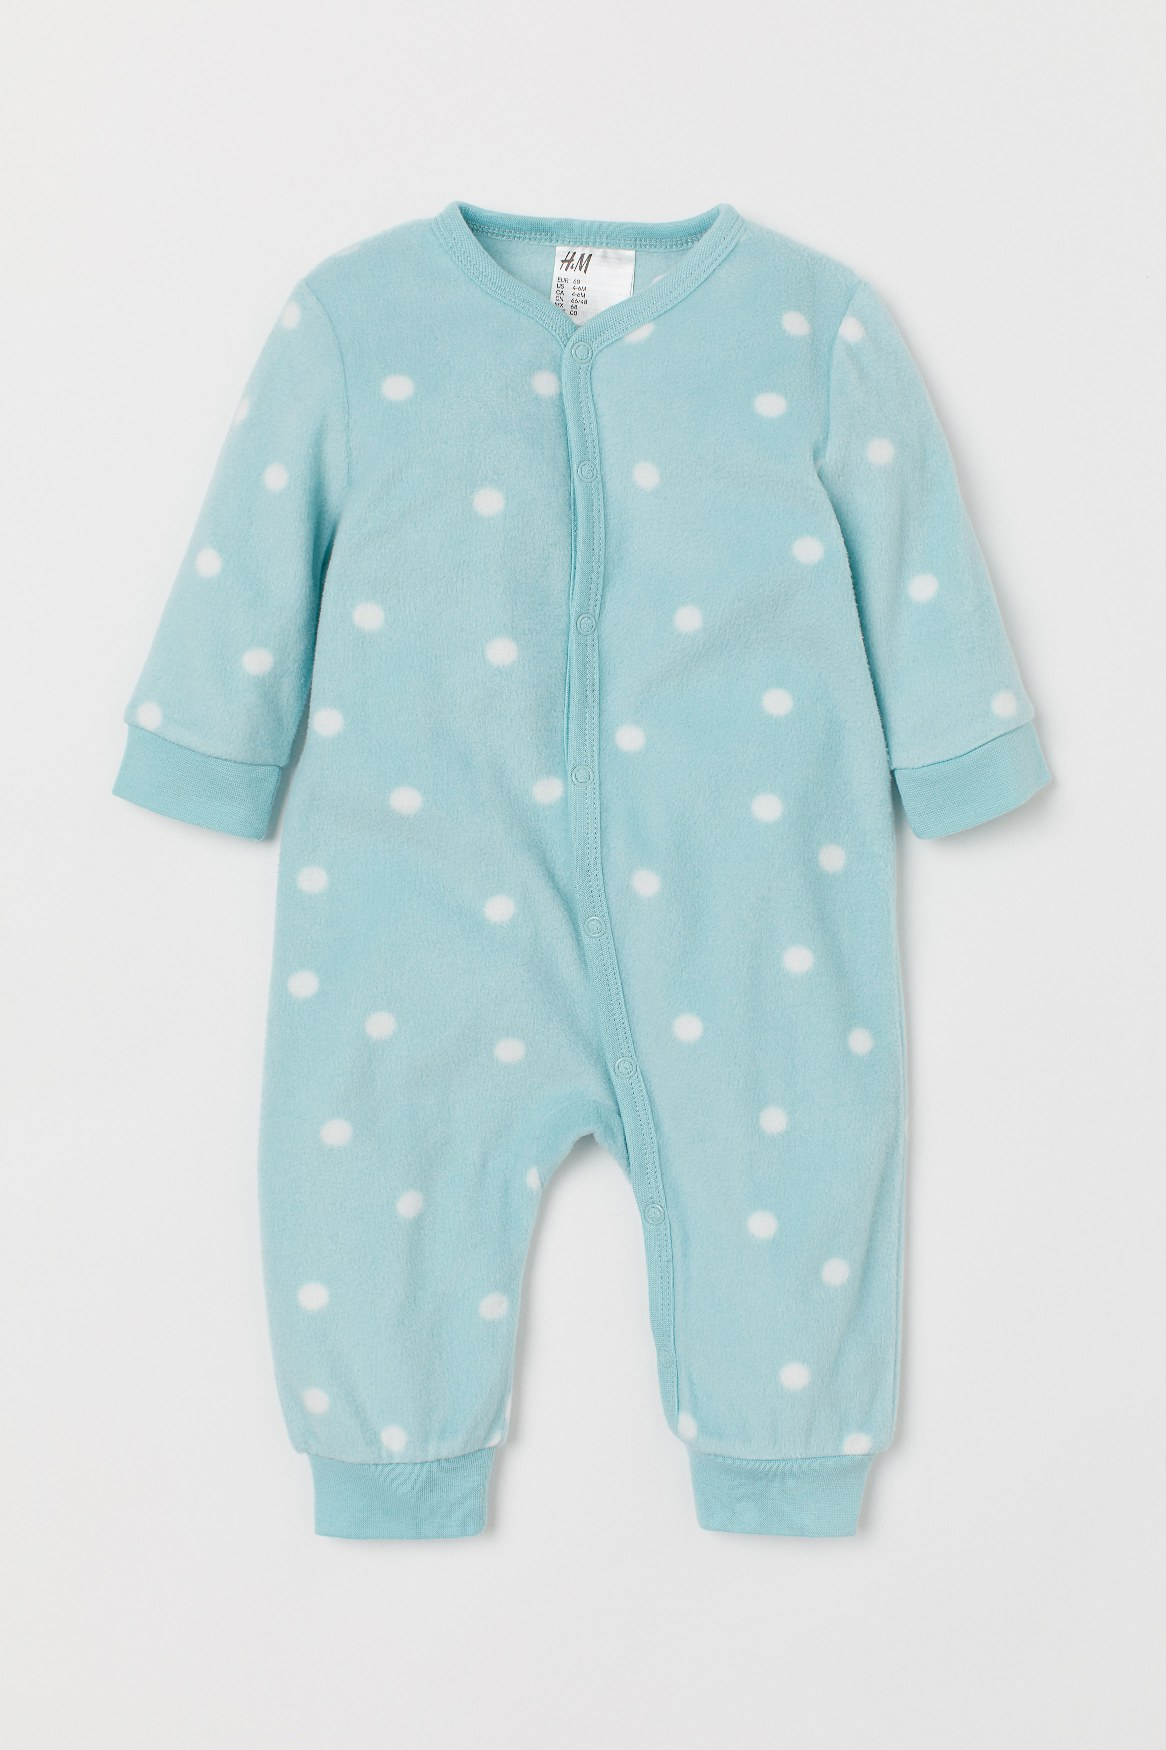

Product Title:  FLEECE PYJAMA

 ==================== Recommended products ====================


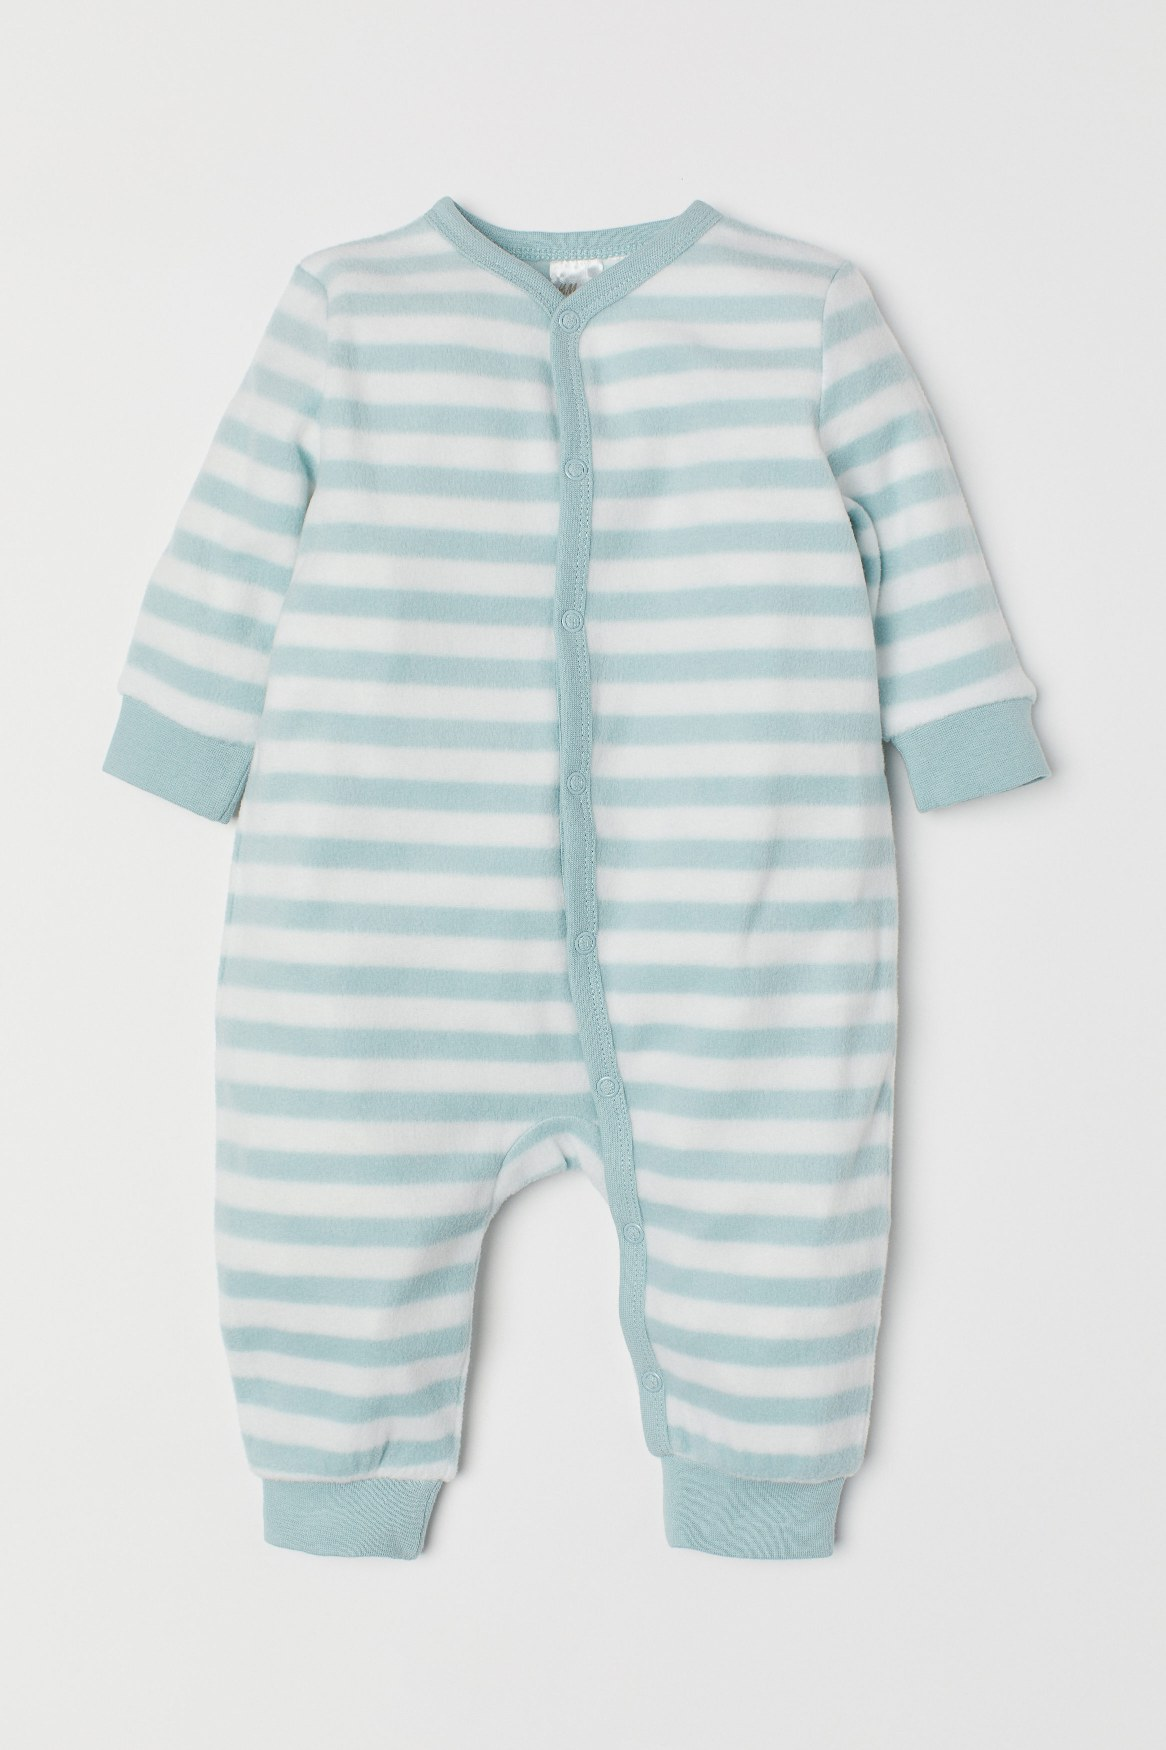

Product Title:  FLEECE PYJAMA
Euclidean Distance from input image: 4.558478


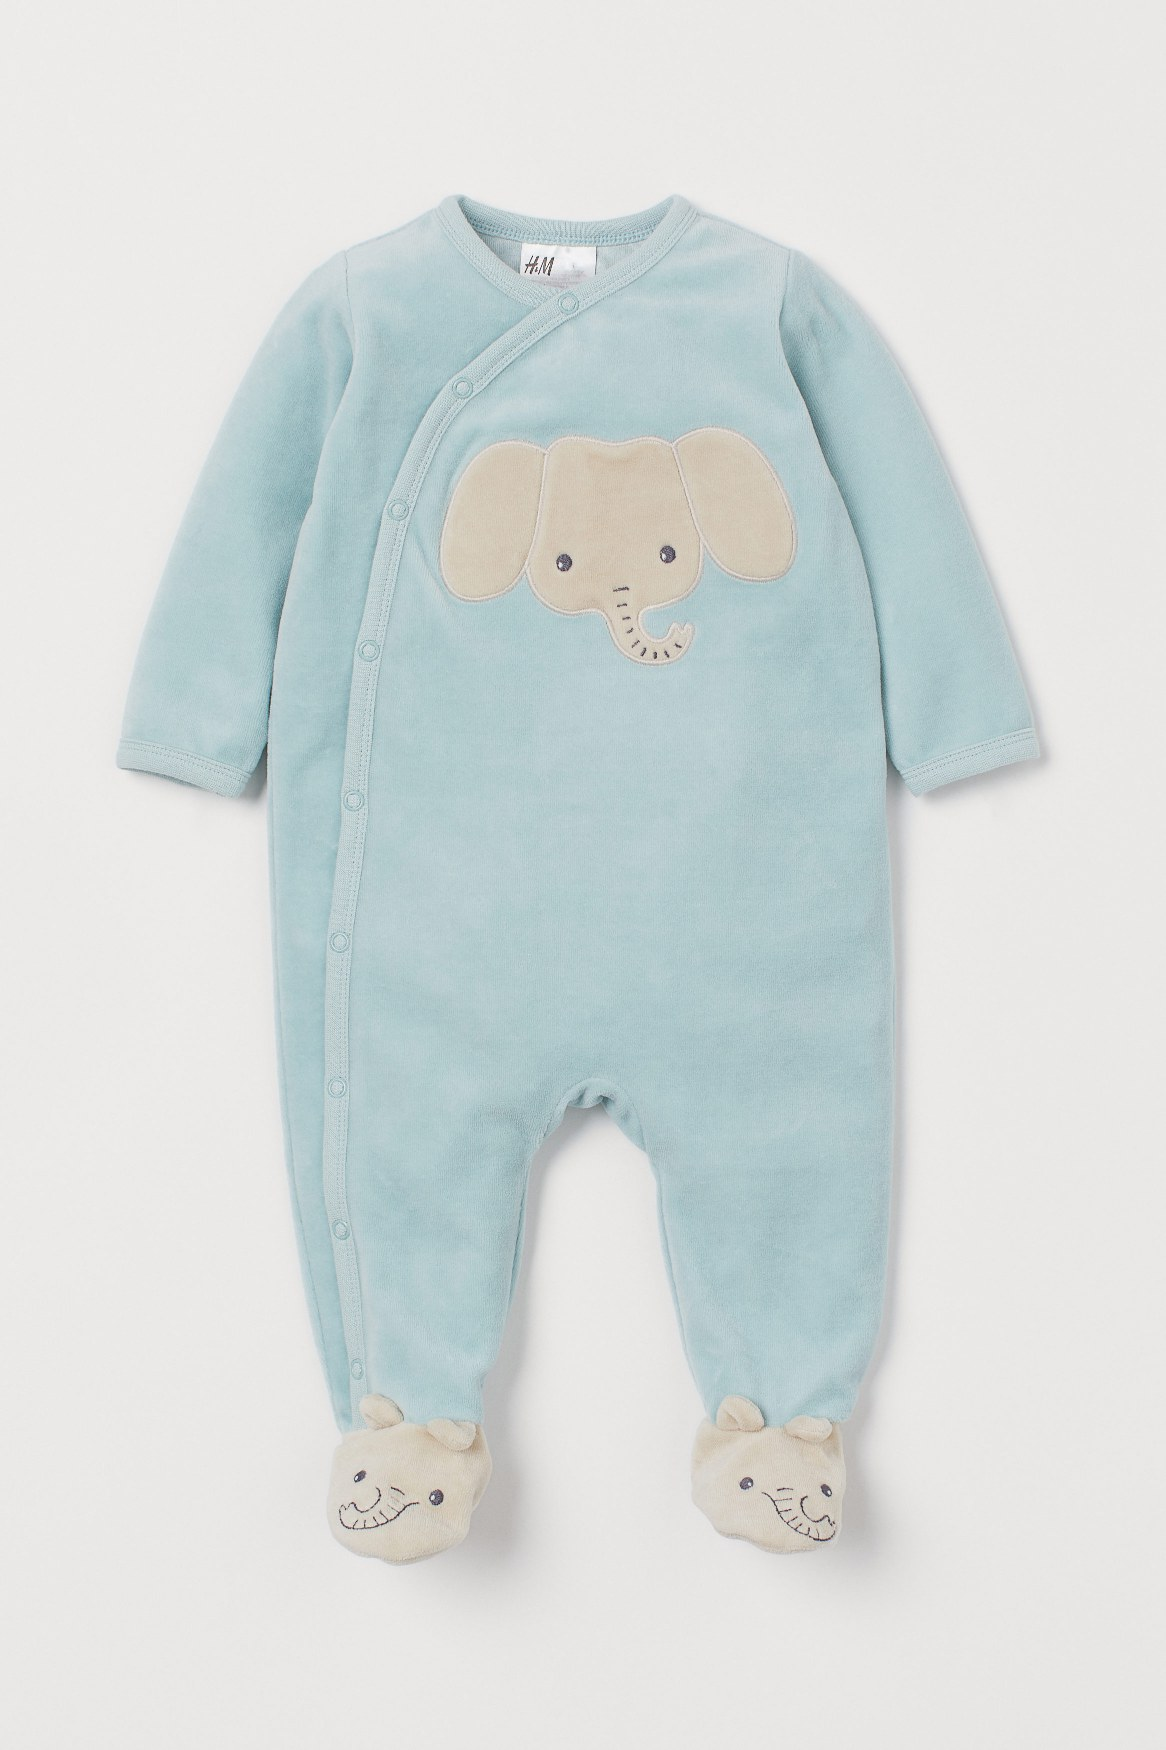

Product Title:  Velour PJ w feet TVP
Euclidean Distance from input image: 4.764682


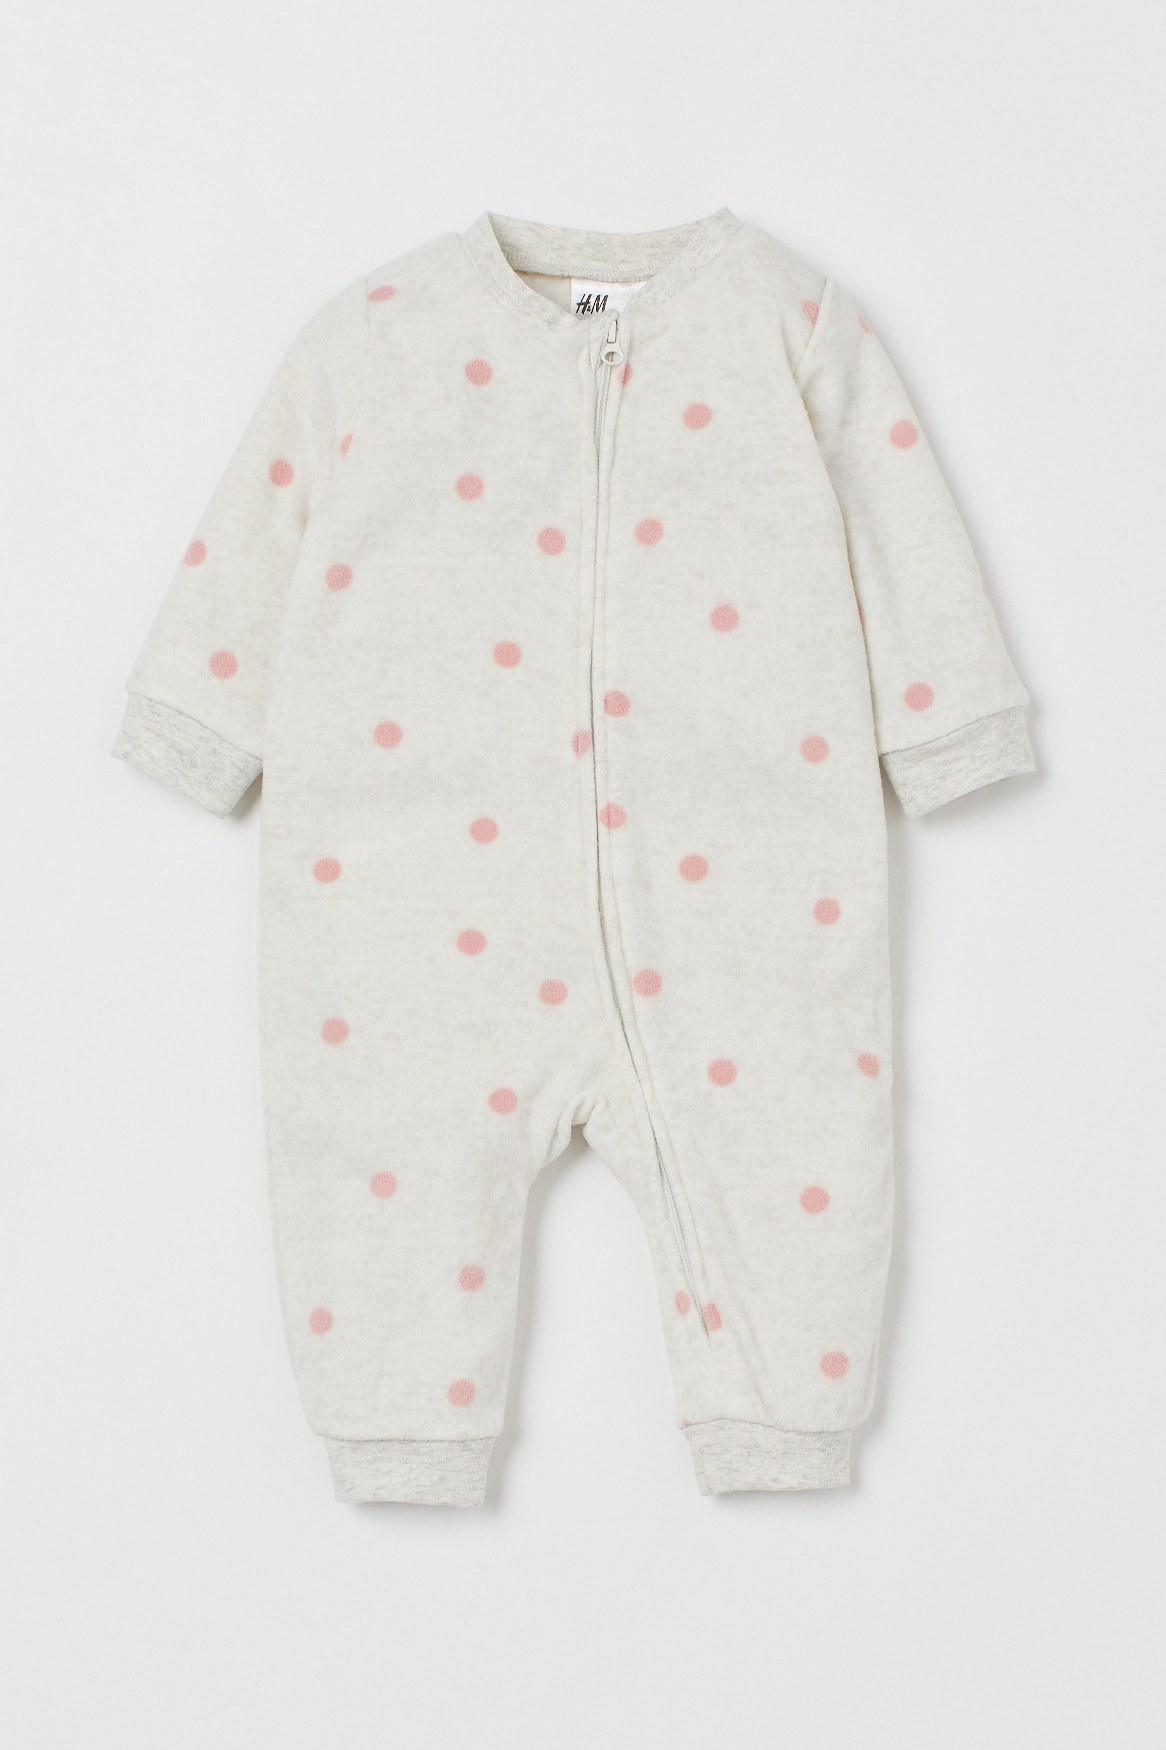

Product Title:  FLEECE PYJAMA
Euclidean Distance from input image: 4.922101


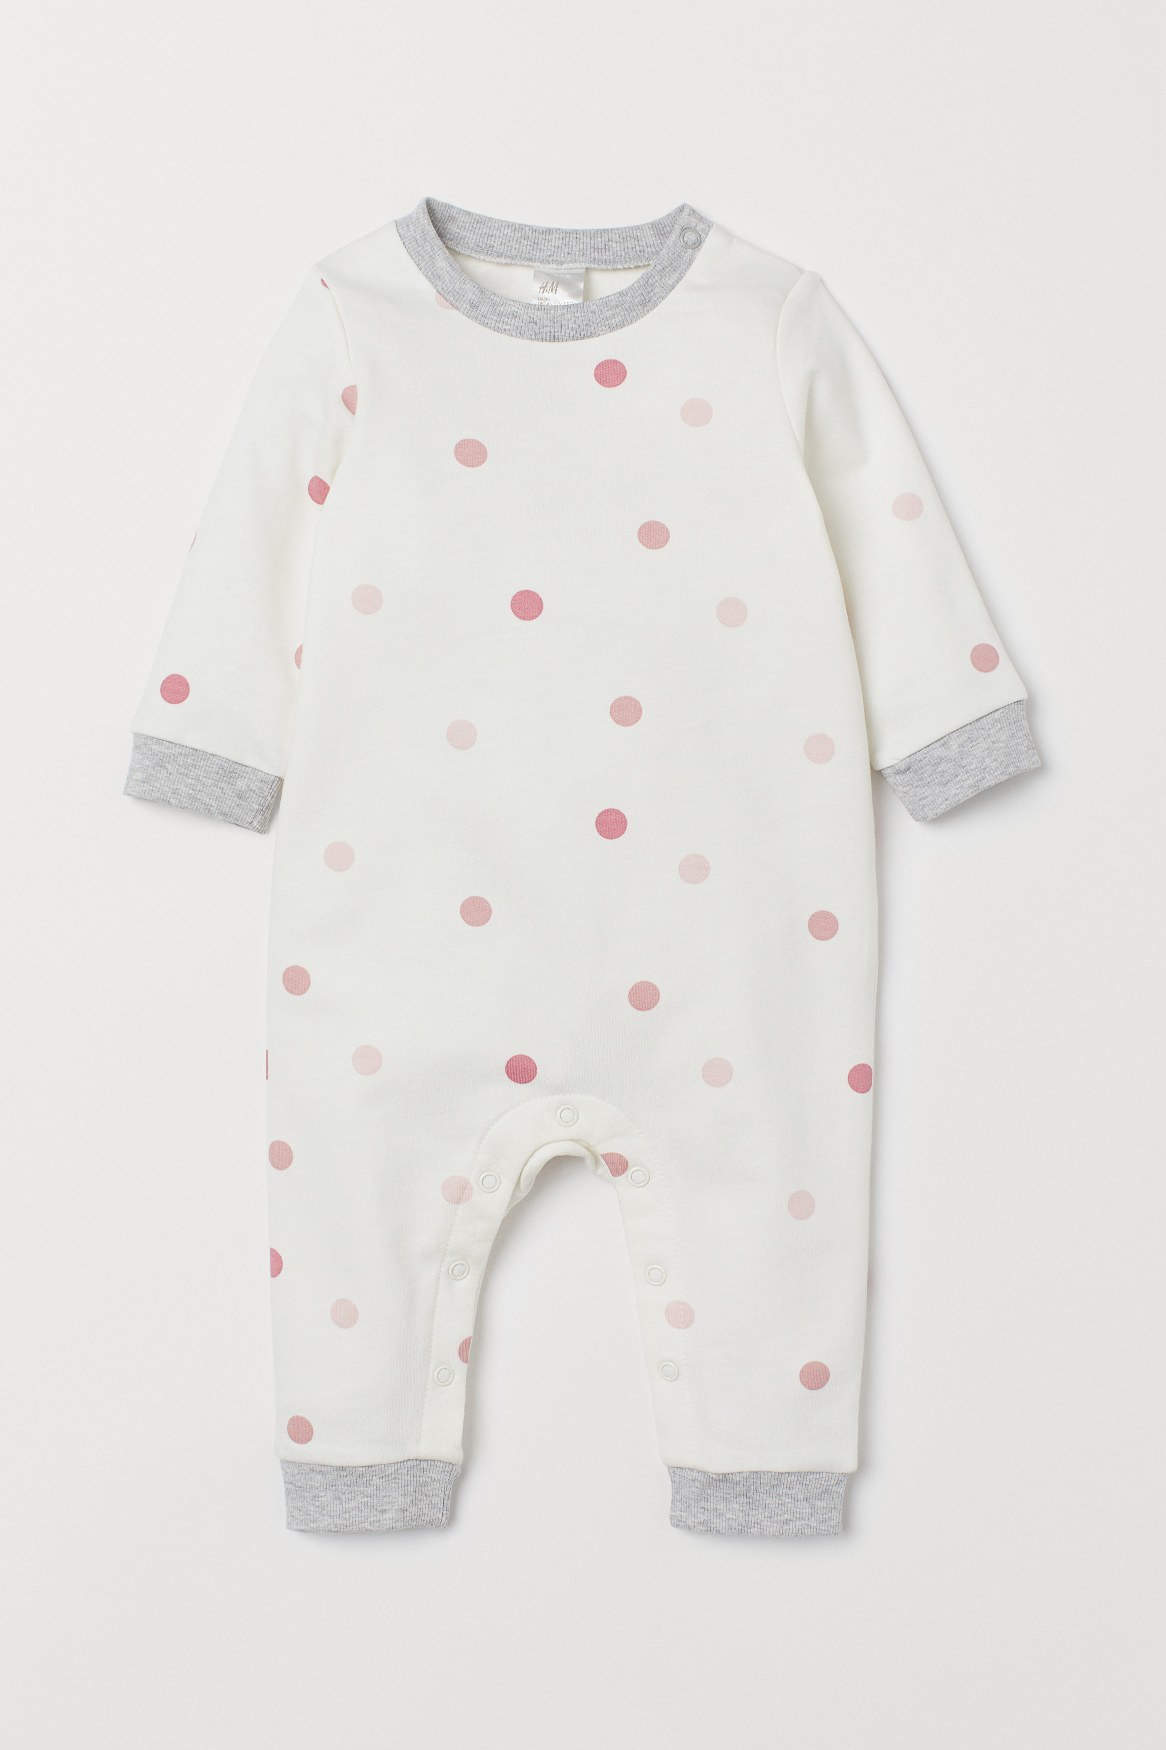

Product Title:  Sweatshirt Overall
Euclidean Distance from input image: 4.98278


In [9]:
get_similar_products_cnn1('0174057035', 5)

## Remaining 57K articles

In [21]:
extracted_features = np.load('/Users/danielyang/Desktop/DSAI Lab/57k_features_2.npy')
Productids2 = np.load('/Users/danielyang/Desktop/DSAI Lab/57k_ids_2.npy')
Productids2 = list(Productids2)
Productids2

['0690027001',
 '0690033001',
 '0690048001',
 '0690054001',
 '0690054002',
 '0690054004',
 '0690054006',
 '0690054007',
 '0690054009',
 '0690066001',
 '0690074001',
 '0690074002',
 '0690076001',
 '0690076002',
 '0690077001',
 '0690090001',
 '0690091002',
 '0690093001',
 '0690093002',
 '0690102005',
 '0690107001',
 '0690108001',
 '0690108003',
 '0690108004',
 '0690108005',
 '0690112002',
 '0690114001',
 '0690114002',
 '0690115001',
 '0690115002',
 '0690156001',
 '0690156002',
 '0690157002',
 '0690158001',
 '0690158002',
 '0690158003',
 '0690158007',
 '0690158008',
 '0690158011',
 '0690158012',
 '0690158013',
 '0690174001',
 '0690176001',
 '0690183001',
 '0690183003',
 '0690193001',
 '0690193002',
 '0690193003',
 '0690193005',
 '0690193007',
 '0690193008',
 '0690197001',
 '0690200001',
 '0690202001',
 '0690209002',
 '0690211001',
 '0690212001',
 '0690212002',
 '0690213001',
 '0690217001',
 '0690222001',
 '0690222002',
 '0690222003',
 '0690222004',
 '0690222005',
 '0690222006',
 '06902220

==================== input product image ====================


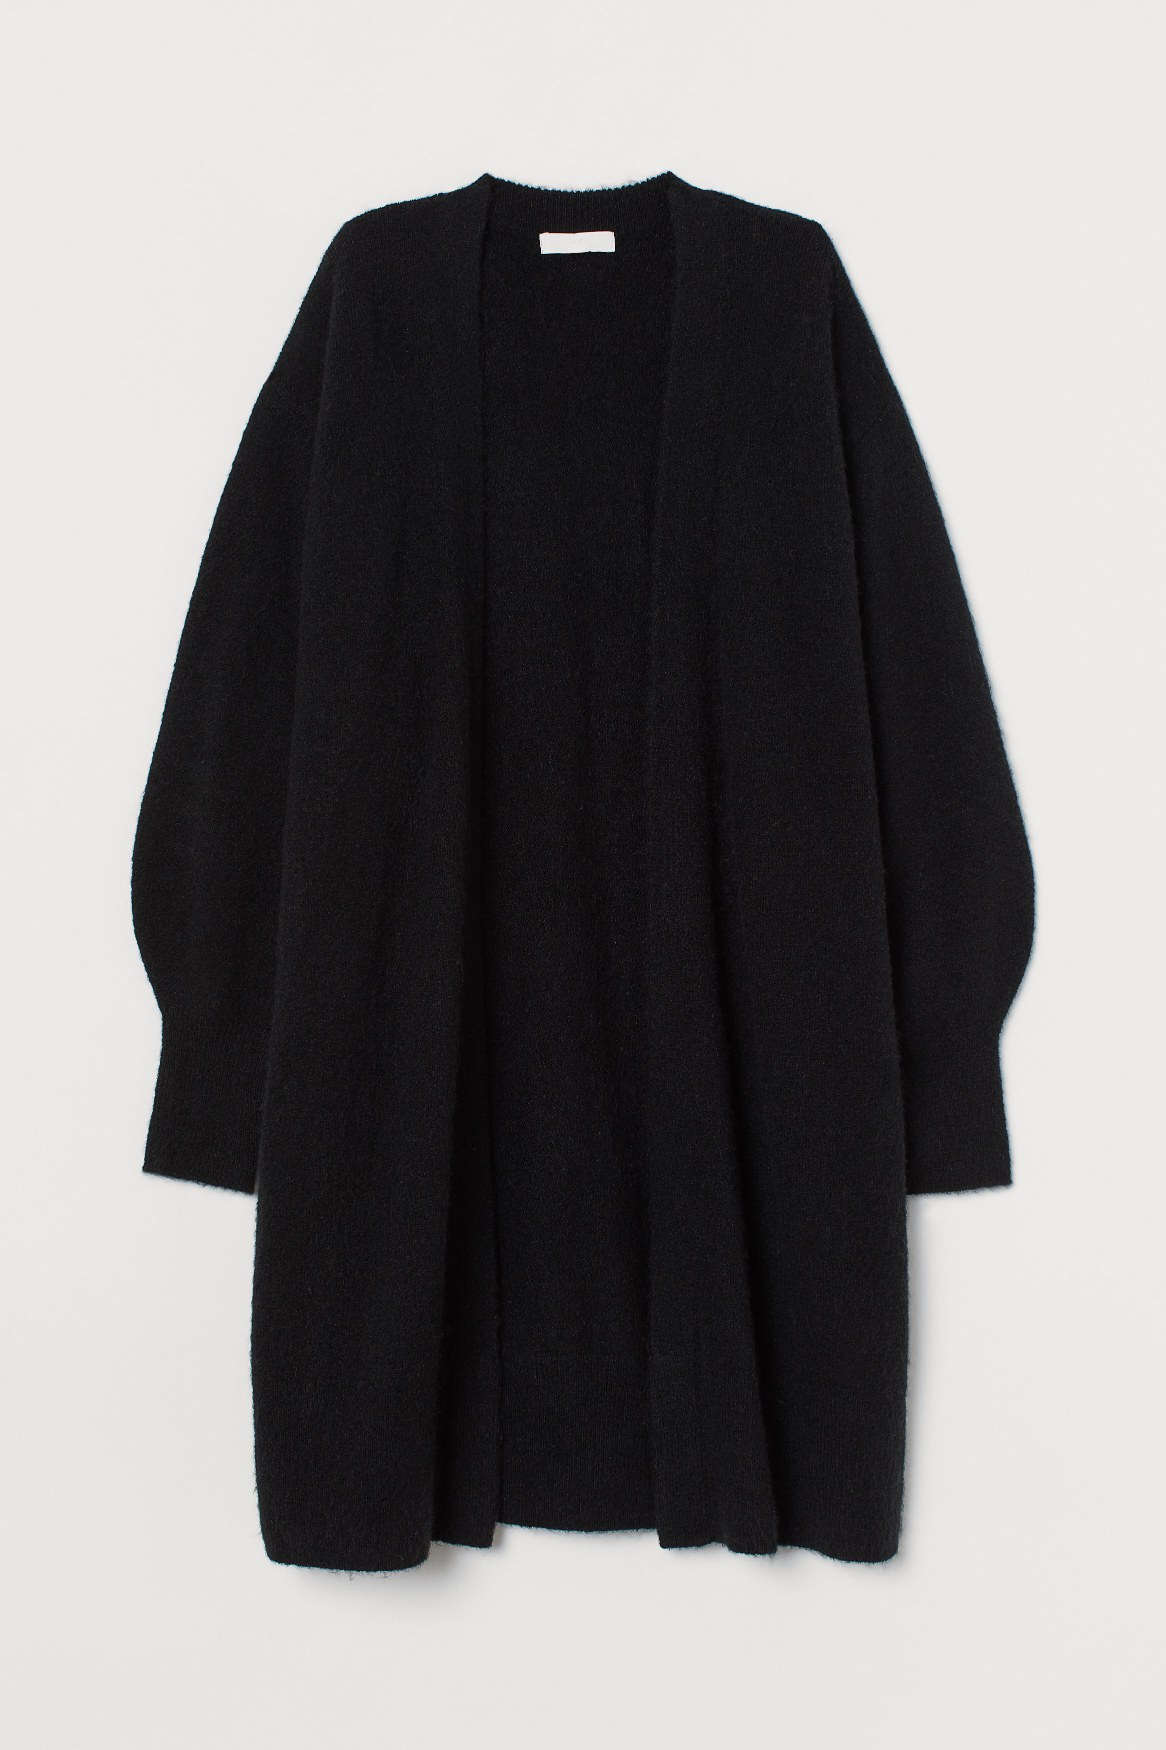

Product Title:  Baraboom throw-on

 ==================== Recommended products ====================


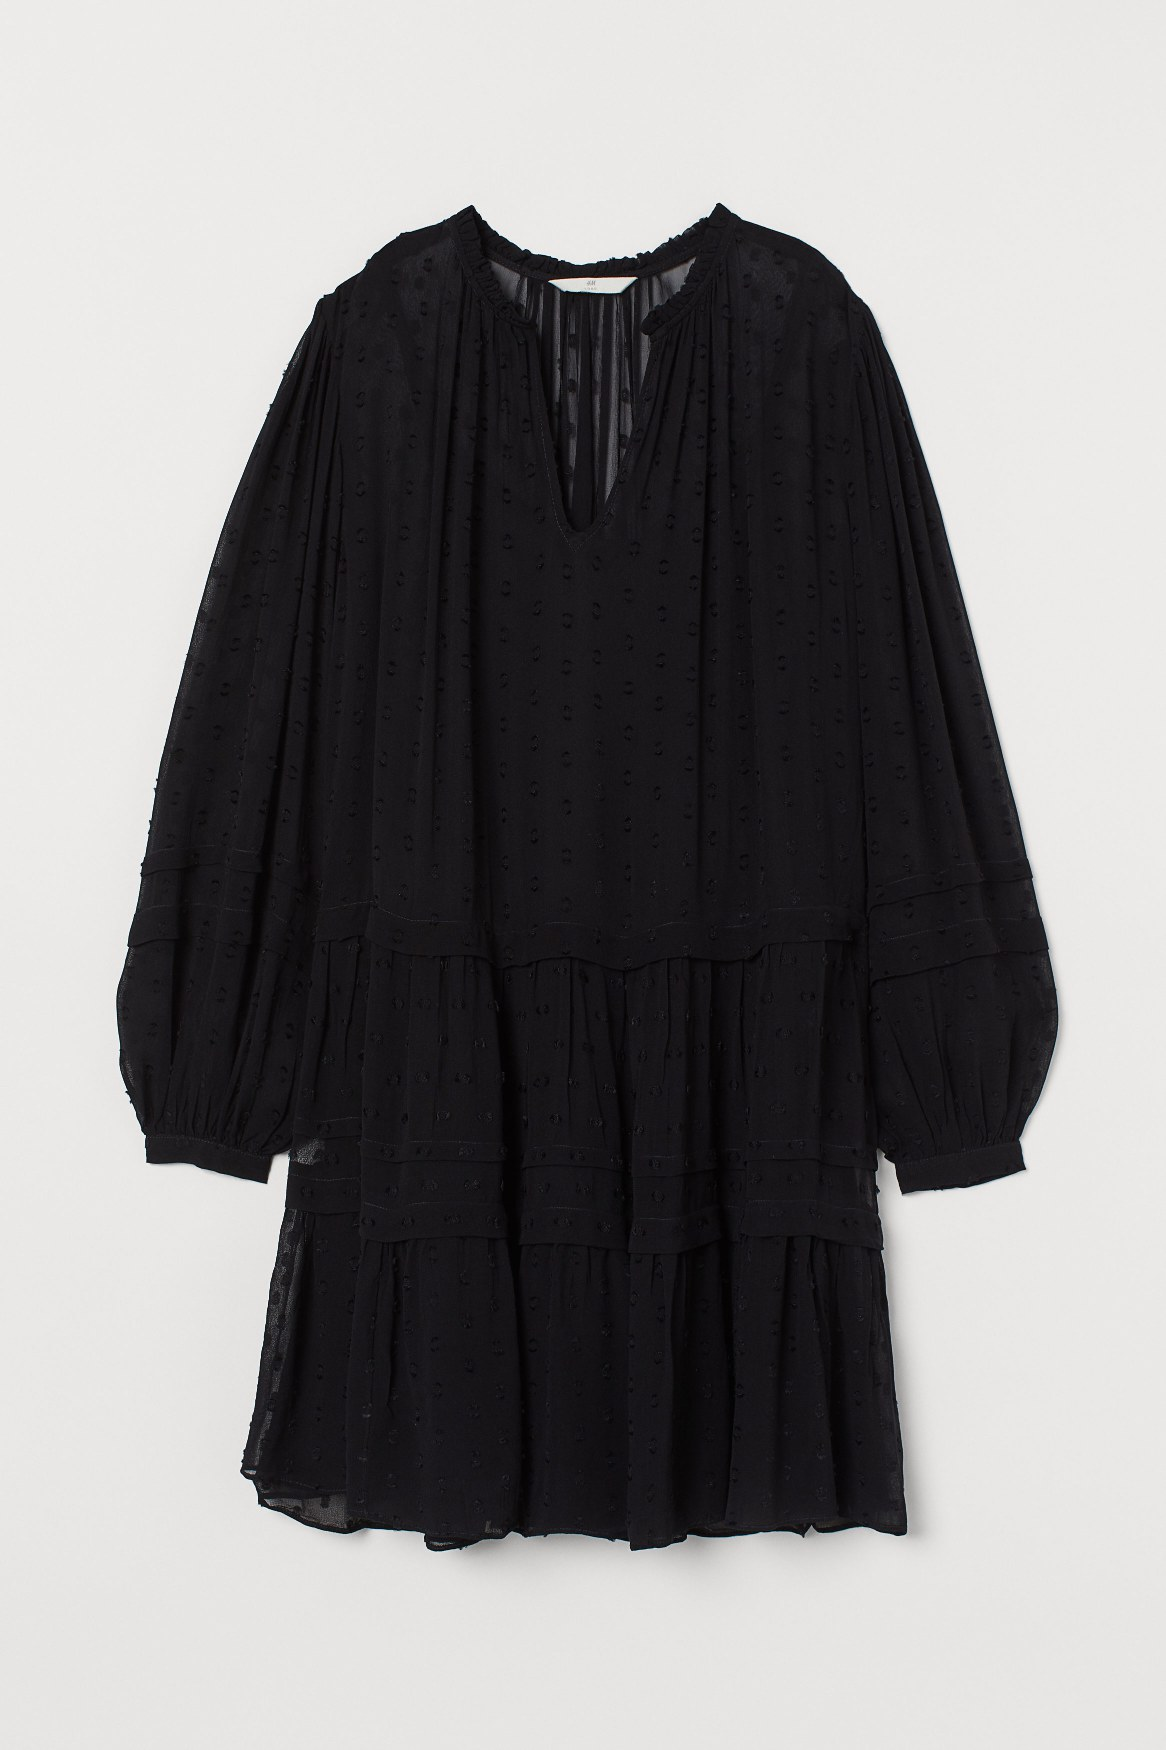

Product Title:  Vendela tunic
Euclidean Distance from input image: 22.944746


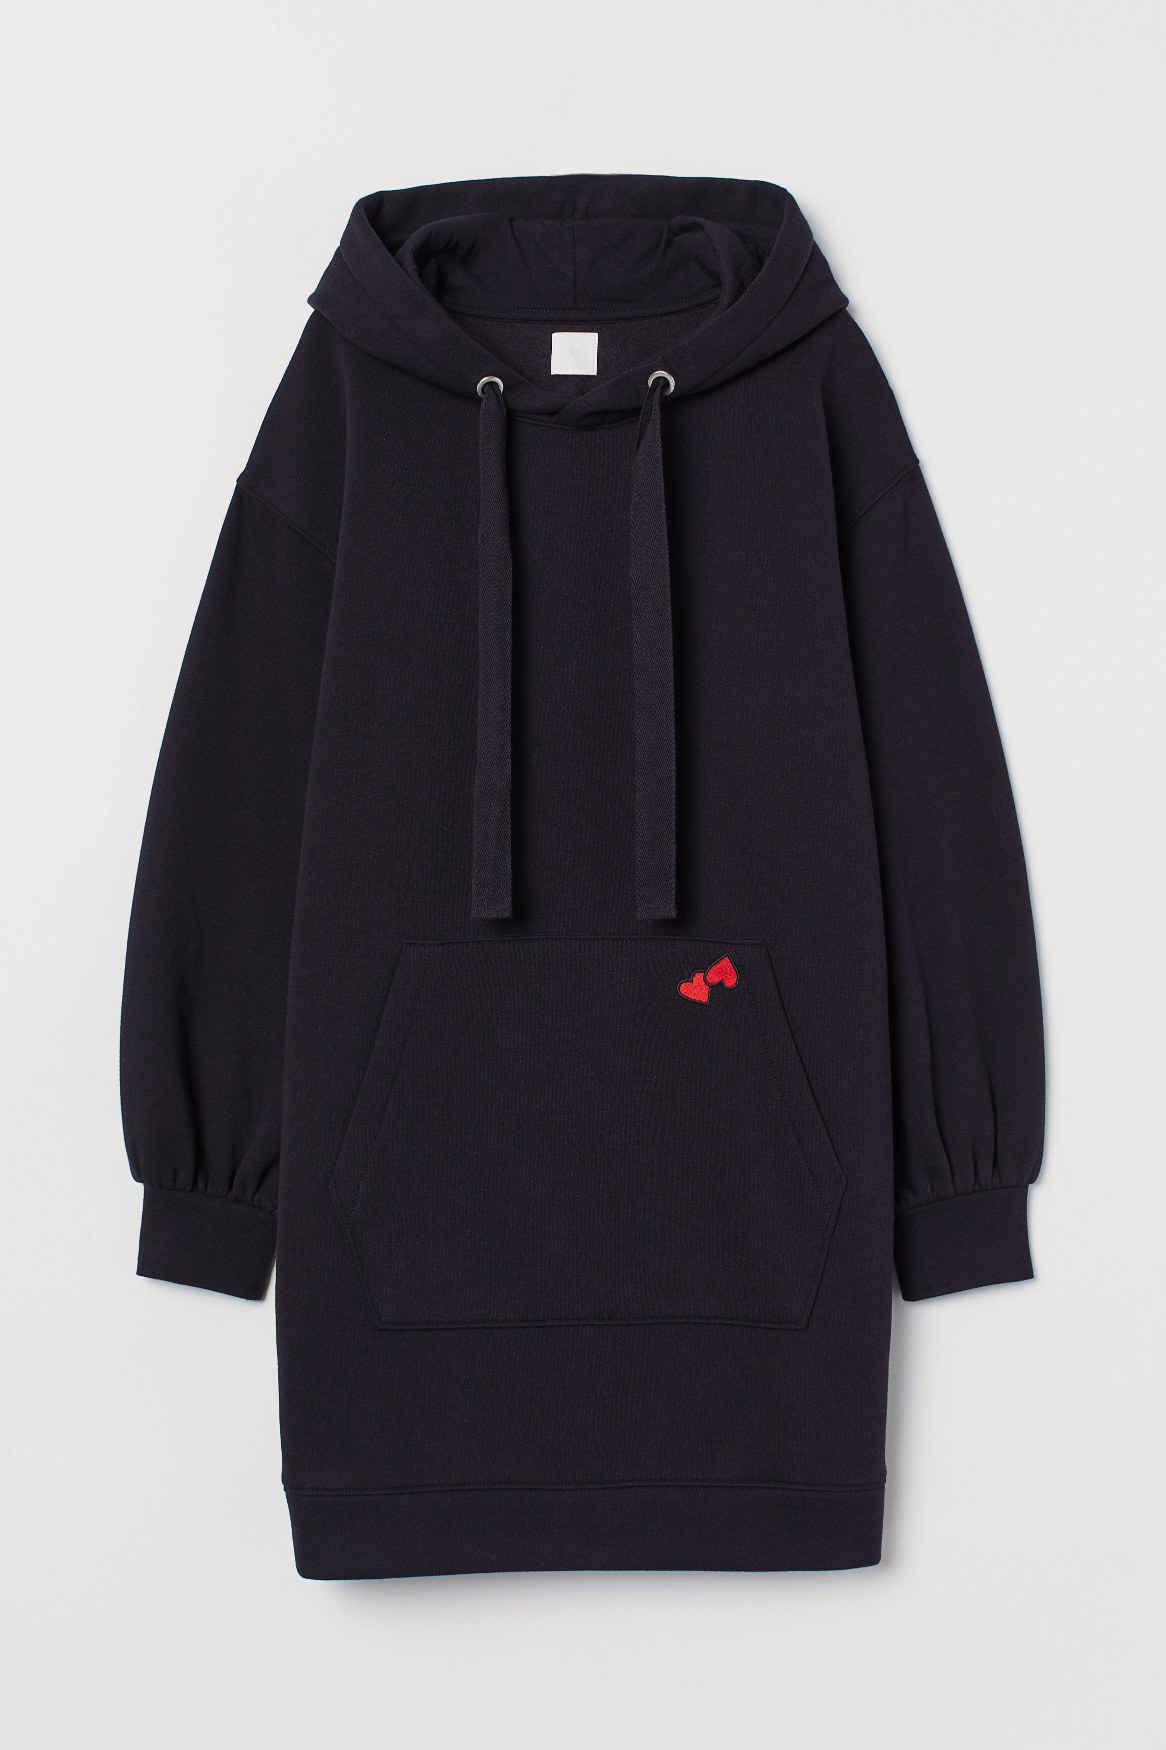

Product Title:  CNY Milkyway solid
Euclidean Distance from input image: 23.384897


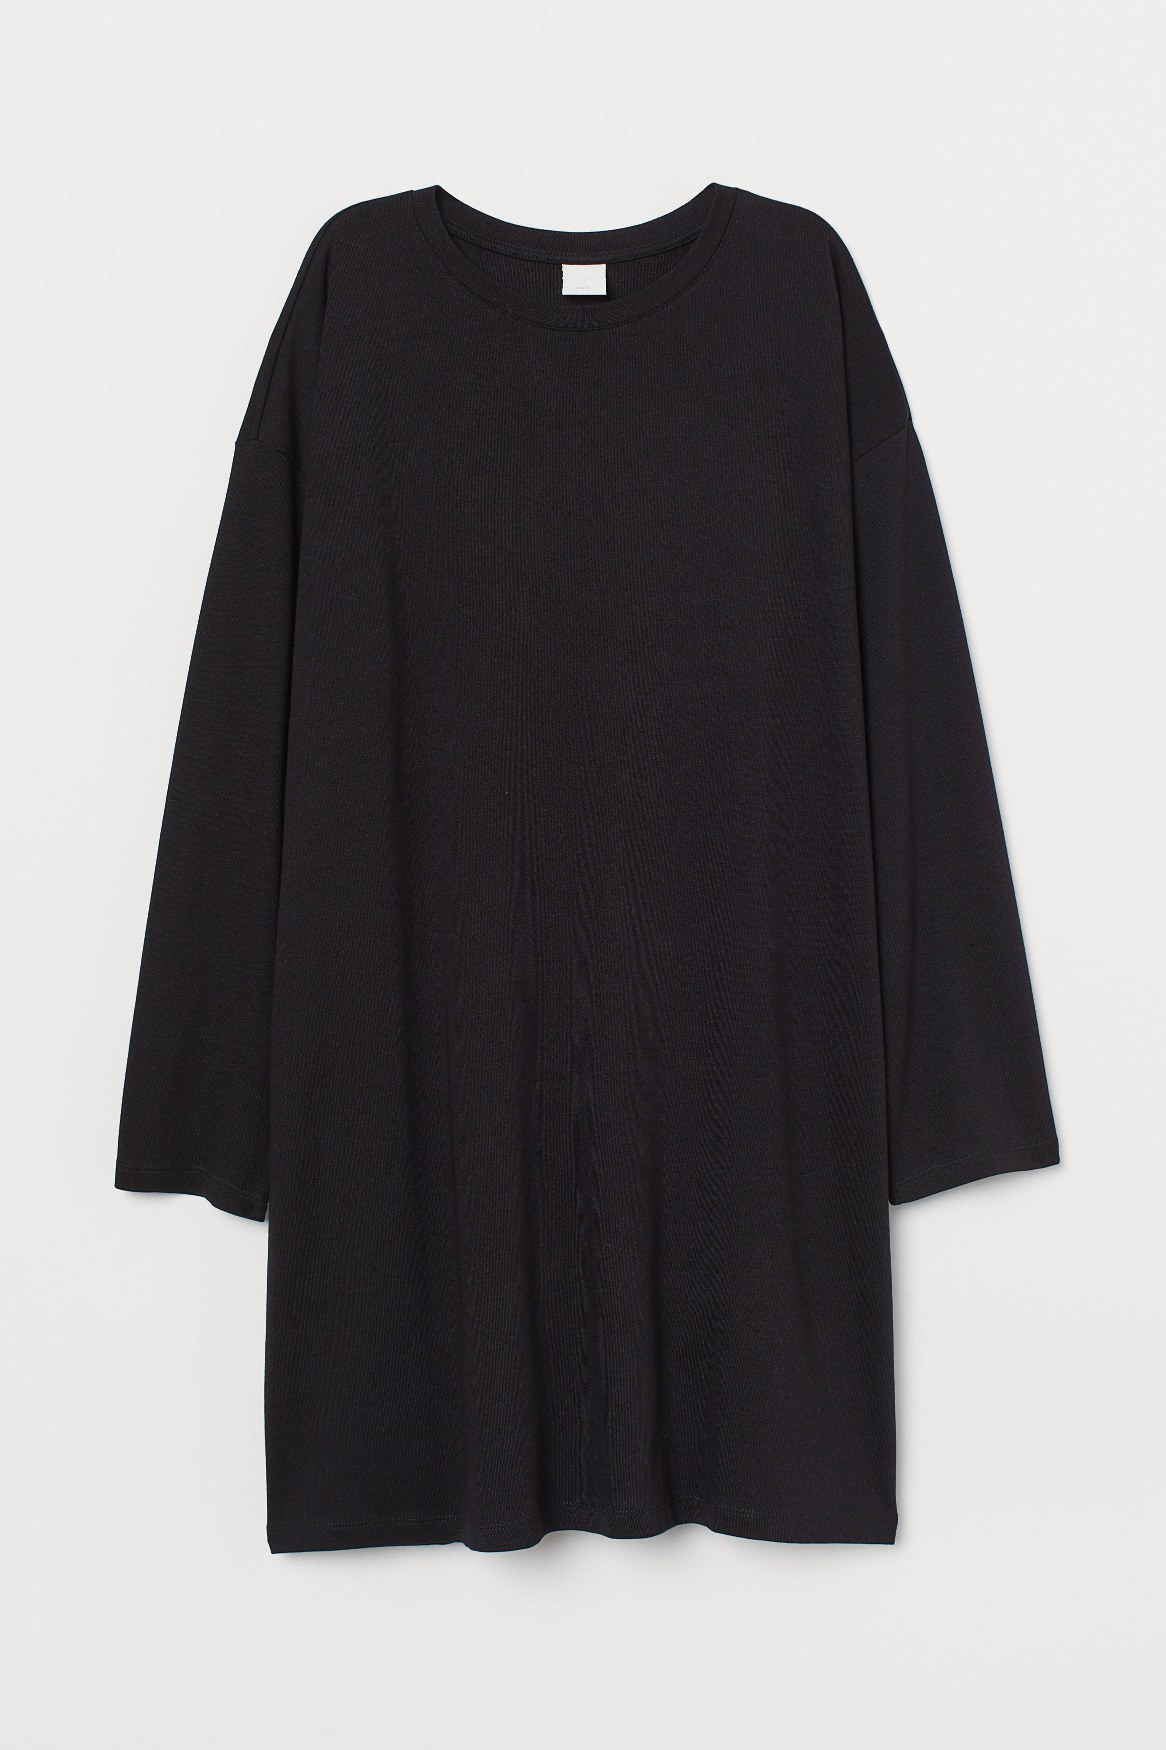

Product Title:  Shanghai dress
Euclidean Distance from input image: 23.738039


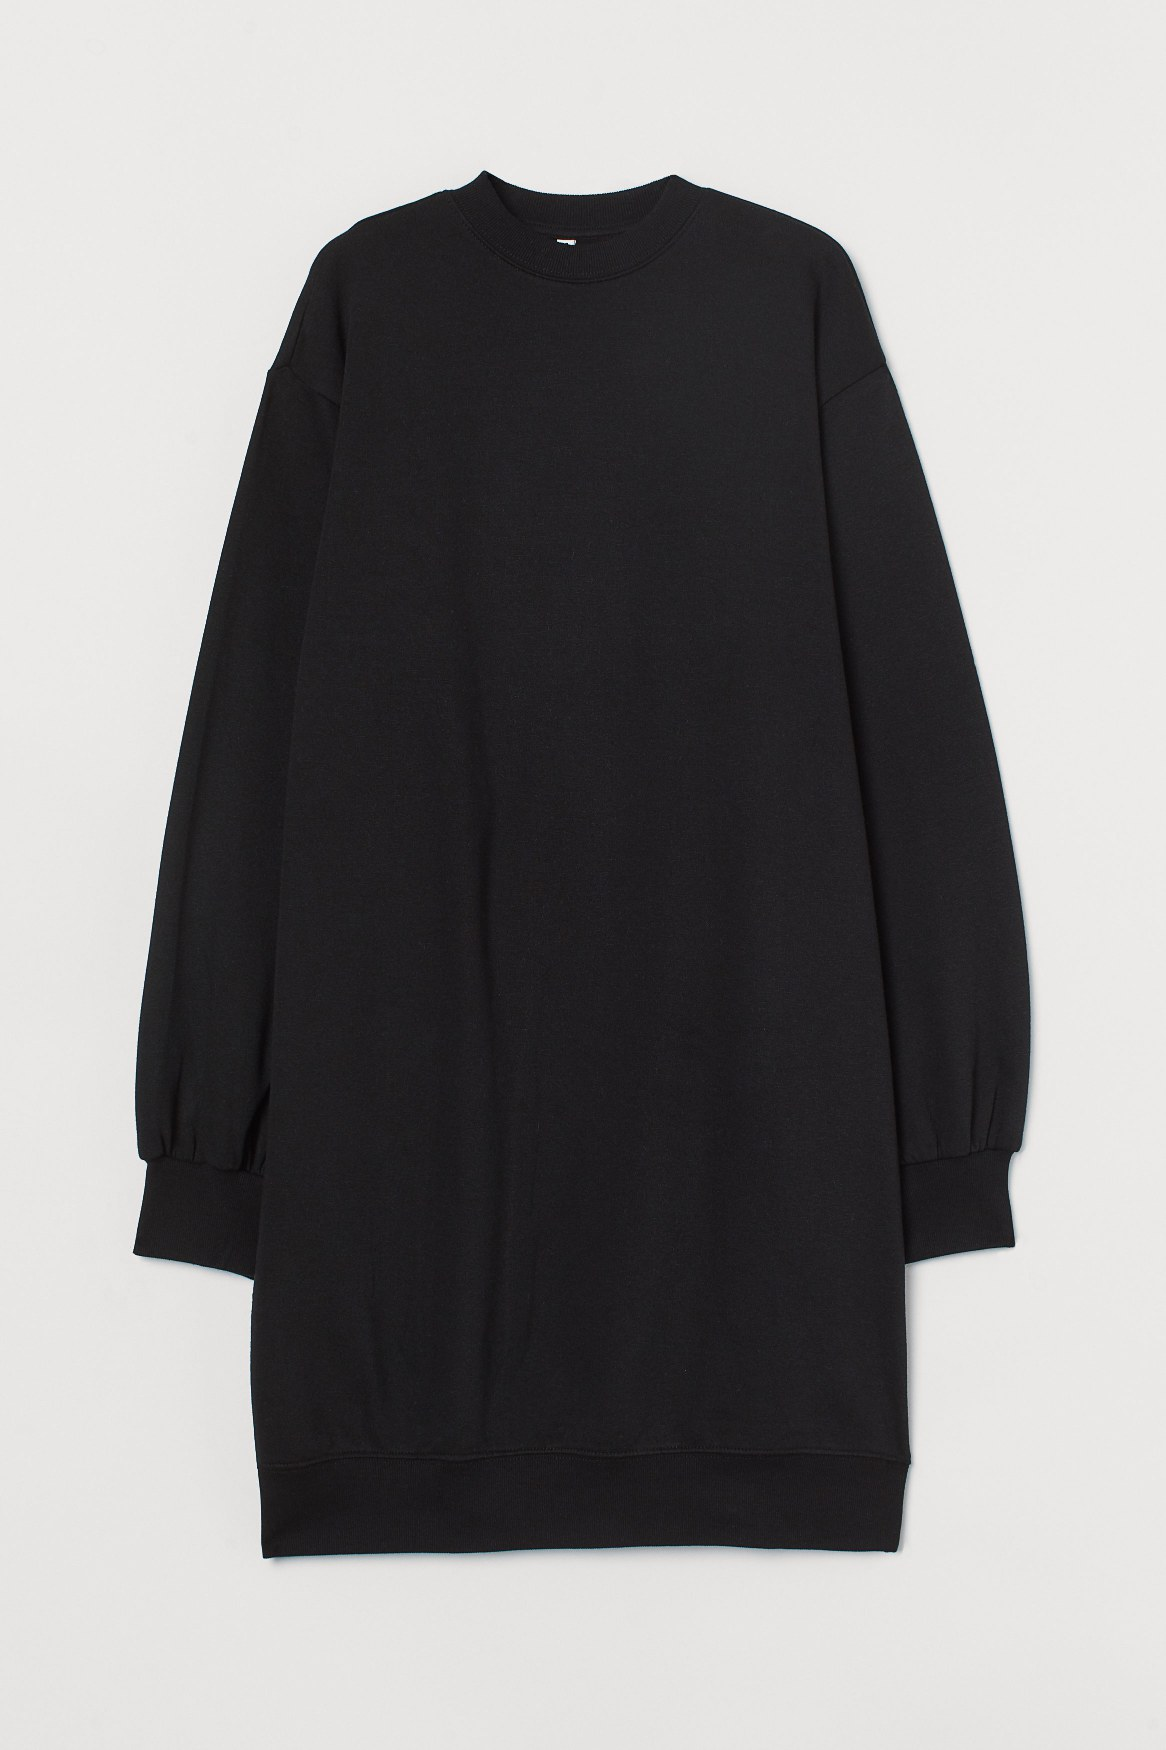

Product Title:  Elle Sweater Dress
Euclidean Distance from input image: 24.17226


In [22]:
def get_similar_products_cnn2(product_id, num_results):
    doc_id = Productids2.index(product_id)
    pairwise_dist = pairwise_distances(extracted_features, extracted_features[doc_id].reshape(1,-1))
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    print("="*20, "input product image", "="*20)
    ip_row = a_copy[['article_id','prod_name']].loc[a_copy['article_id']==int(Productids2[indices[0]])]
#     print(ip_row.head())
    for indx, row in ip_row.iterrows():
        display(Image(filename = "/Users/danielyang/Downloads/h-and-m-personalized-fashion-recommendations/images/" + str(product_id)[0:3]+'/'+str(product_id)+'.jpg', width = 224, height = 224,embed=True))
        print('Product Title: ', row['prod_name'])
    print("\n","="*20, "Recommended products", "="*20)
    for i in range(1,len(indices)):
        rows = a_copy[['article_id','prod_name']].loc[a_copy['article_id']==int(Productids2[indices[i]])]
#         print(rows)
        for indx, row in rows.iterrows():
            display(Image(filename = "/Users/danielyang/Downloads/h-and-m-personalized-fashion-recommendations/images/" + '0' + str(row['article_id'])[0:2] +'/'+ "0" +str(row['article_id'])+'.jpg', width = 224, height = 224,embed=True))
            print('Product Title: ', row['prod_name'])
            print('Euclidean Distance from input image:', pdists[i])

get_similar_products_cnn2('0863595006', 5)